### Deliverable 3: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'], axis=1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app = (application_df["APPLICATION_TYPE"].value_counts())
app

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

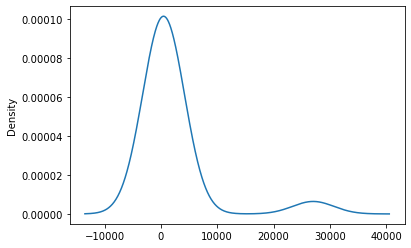

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app[app < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classify = application_df.CLASSIFICATION.value_counts()
classify

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1283        1
C2170        1
C4200        1
C2600        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

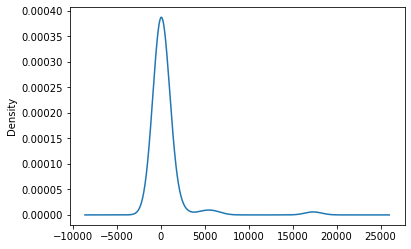

In [8]:
# Visualize the value counts of CLASSIFICATION
classify.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classify[classify < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Attempt 1 More Neurons

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=120, 
                                   activation="relu", 
                                   input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=90, 
                                   activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, 
                                   activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               5280      
                                                                 
 dense_1 (Dense)             (None, 90)                10890     
                                                                 
 dense_2 (Dense)             (None, 1)                 91        
                                                                 
Total params: 16,261
Trainable params: 16,261
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [18]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 5:59 - loss: 531.6377 - accuracy: 0.4375
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 10/804 [..............................] - ETA: 5s - loss: 1979.7029 - accuracy: 0.4844 
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 20/804 [..............................] - ETA: 5s - loss: 2937.9294 - accuracy: 0.4875
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 30/804 [>.............................] - ETA: 5s - loss: 4519.8613 - accuracy: 0.4948
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 40/804 [>.............................] - ETA: 5s - loss: 4209.0693 - accuracy: 0.4828
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 50/804 [>...........

420/804 [==============>...............] - ETA: 2s - loss: 103776.8984 - accuracy: 0.4859
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
430/804 [===============>..............] - ETA: 2s - loss: 101427.0703 - accuracy: 0.4859
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
440/804 [===============>..............] - ETA: 2s - loss: 102335.7266 - accuracy: 0.4869
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
450/804 [===============>..............] - ETA: 2s - loss: 101141.3438 - accuracy: 0.4864
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
462/804 [================>.............] - ETA: 1s - loss: 98554.8281 - accuracy: 0.4857 
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
471/804 [================

 31/804 [>.............................] - ETA: 4s - loss: 3573.5747 - accuracy: 0.4536
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 41/804 [>.............................] - ETA: 4s - loss: 2983.4092 - accuracy: 0.4642
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 56/804 [=>............................] - ETA: 3s - loss: 2457.3091 - accuracy: 0.4699
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 68/804 [=>............................] - ETA: 3s - loss: 2946.0547 - accuracy: 0.4710
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 76/804 [=>............................] - ETA: 3s - loss: 3038.7361 - accuracy: 0.4757
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoin

461/804 [================>.............] - ETA: 1s - loss: 71353.7969 - accuracy: 0.5028
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
471/804 [================>.............] - ETA: 1s - loss: 71516.9688 - accuracy: 0.5032
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
481/804 [================>.............] - ETA: 1s - loss: 70165.4375 - accuracy: 0.5042
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
491/804 [=================>............] - ETA: 1s - loss: 71570.0547 - accuracy: 0.5038
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
504/804 [=================>............] - ETA: 1s - loss: 73797.8047 - accuracy: 0.5042
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
511/804 [==================>..


Epoch 3: saving model to checkpoints\weights.03hdf5
 77/804 [=>............................] - ETA: 4s - loss: 18935.7598 - accuracy: 0.4716
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 17598.6875 - accuracy: 0.4770
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 16154.6396 - accuracy: 0.4820
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
107/804 [==>...........................] - ETA: 4s - loss: 47155.5469 - accuracy: 0.4834
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
117/804 [===>..........................] - ETA: 4s - loss: 43473.6367 - accuracy: 0.4842
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to chec

492/804 [=================>............] - ETA: 1s - loss: 27632.2129 - accuracy: 0.4888
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
502/804 [=================>............] - ETA: 1s - loss: 27173.7422 - accuracy: 0.4880
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
512/804 [==================>...........] - ETA: 1s - loss: 26729.8301 - accuracy: 0.4875
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
522/804 [==================>...........] - ETA: 1s - loss: 26352.4922 - accuracy: 0.4867
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
532/804 [==================>...........] - ETA: 1s - loss: 27245.2461 - accuracy: 0.4865
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
542/804 [===================>.

111/804 [===>..........................] - ETA: 3s - loss: 9237.6221 - accuracy: 0.5087
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
119/804 [===>..........................] - ETA: 3s - loss: 8624.6279 - accuracy: 0.5095
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
128/804 [===>..........................] - ETA: 3s - loss: 8628.2402 - accuracy: 0.5103
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
138/804 [====>.........................] - ETA: 3s - loss: 8168.8931 - accuracy: 0.5122
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
148/804 [====>.........................] - ETA: 3s - loss: 19096.7910 - accuracy: 0.5133
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
158/804 [====>....................

528/804 [==================>...........] - ETA: 1s - loss: 19707.5176 - accuracy: 0.4966
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
538/804 [===================>..........] - ETA: 1s - loss: 19398.3555 - accuracy: 0.4977
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
548/804 [===================>..........] - ETA: 1s - loss: 19499.5449 - accuracy: 0.4968
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
558/804 [===================>..........] - ETA: 1s - loss: 19268.1562 - accuracy: 0.4961
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
568/804 [====================>.........] - ETA: 1s - loss: 18990.7051 - accuracy: 0.4961
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
578/804 [====================>

139/804 [====>.........................] - ETA: 3s - loss: 30233.1660 - accuracy: 0.5144
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
149/804 [====>.........................] - ETA: 3s - loss: 28861.5664 - accuracy: 0.5099
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
159/804 [====>.........................] - ETA: 3s - loss: 27430.6387 - accuracy: 0.5081
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
169/804 [=====>........................] - ETA: 3s - loss: 27682.3457 - accuracy: 0.5055
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
179/804 [=====>........................] - ETA: 3s - loss: 26670.6543 - accuracy: 0.5047
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
189/804 [======>..............

559/804 [===================>..........] - ETA: 1s - loss: 67359.2891 - accuracy: 0.4988
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
569/804 [====================>.........] - ETA: 1s - loss: 66599.6797 - accuracy: 0.4984
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
579/804 [====================>.........] - ETA: 1s - loss: 65469.4023 - accuracy: 0.4981
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
593/804 [=====================>........] - ETA: 1s - loss: 64053.2734 - accuracy: 0.4966
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
599/804 [=====================>........] - ETA: 1s - loss: 65504.4336 - accuracy: 0.4963
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
609/804 [=====================

170/804 [=====>........................] - ETA: 3s - loss: 5816.4238 - accuracy: 0.4972
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
180/804 [=====>........................] - ETA: 3s - loss: 5922.9033 - accuracy: 0.4983
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
190/804 [======>.......................] - ETA: 3s - loss: 6137.9639 - accuracy: 0.5008
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
200/804 [======>.......................] - ETA: 3s - loss: 6042.9062 - accuracy: 0.5017
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
210/804 [======>.......................] - ETA: 3s - loss: 6606.2710 - accuracy: 0.5030
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
220/804 [=======>..................

595/804 [=====================>........] - ETA: 1s - loss: 5316.6650 - accuracy: 0.5008
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
605/804 [=====================>........] - ETA: 1s - loss: 5263.6768 - accuracy: 0.5010
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
615/804 [=====================>........] - ETA: 1s - loss: 5193.4316 - accuracy: 0.5015
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
625/804 [======================>.......] - ETA: 1s - loss: 5197.1812 - accuracy: 0.5013
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
635/804 [======================>.......] - ETA: 0s - loss: 5153.2593 - accuracy: 0.5014
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
646/804 [=======================>..

211/804 [======>.......................] - ETA: 3s - loss: 32092.1992 - accuracy: 0.5163
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
222/804 [=======>......................] - ETA: 3s - loss: 30507.9395 - accuracy: 0.5203
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
231/804 [=======>......................] - ETA: 3s - loss: 29320.4805 - accuracy: 0.5244
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
241/804 [=======>......................] - ETA: 3s - loss: 28108.8652 - accuracy: 0.5240
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
251/804 [========>.....................] - ETA: 3s - loss: 26992.6113 - accuracy: 0.5259
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
261/804 [========>............

631/804 [======================>.......] - ETA: 0s - loss: 14082.5781 - accuracy: 0.5129
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
641/804 [======================>.......] - ETA: 0s - loss: 13875.6396 - accuracy: 0.5120
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
651/804 [=======================>......] - ETA: 0s - loss: 13690.7861 - accuracy: 0.5109
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
661/804 [=======================>......] - ETA: 0s - loss: 13491.5254 - accuracy: 0.5105
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
671/804 [========================>.....] - ETA: 0s - loss: 13296.3916 - accuracy: 0.5104
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
683/804 [=====================


Epoch 8: saving model to checkpoints\weights.08hdf5
248/804 [========>.....................] - ETA: 3s - loss: 21711.0039 - accuracy: 0.5129
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
257/804 [========>.....................] - ETA: 3s - loss: 20954.3477 - accuracy: 0.5129
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
267/804 [========>.....................] - ETA: 3s - loss: 20187.3789 - accuracy: 0.5108
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
277/804 [=========>....................] - ETA: 3s - loss: 19460.9473 - accuracy: 0.5093
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
287/804 [=========>....................] - ETA: 2s - loss: 18785.2812 - accuracy: 0.5094
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to chec

674/804 [========================>.....] - ETA: 0s - loss: 8429.2559 - accuracy: 0.5152
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
686/804 [========================>.....] - ETA: 0s - loss: 8283.0947 - accuracy: 0.5155
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
697/804 [=========================>....] - ETA: 0s - loss: 8156.0522 - accuracy: 0.5150
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
707/804 [=========================>....] - ETA: 0s - loss: 8058.1245 - accuracy: 0.5142
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
717/804 [=========================>....] - ETA: 0s - loss: 7969.7539 - accuracy: 0.5140
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoin

288/804 [=========>....................] - ETA: 3s - loss: 523.1010 - accuracy: 0.5117
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
298/804 [==========>...................] - ETA: 2s - loss: 505.9066 - accuracy: 0.5130
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
308/804 [==========>...................] - ETA: 2s - loss: 490.5368 - accuracy: 0.5114
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
318/804 [==========>...................] - ETA: 2s - loss: 476.4387 - accuracy: 0.5125
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
328/804 [===========>..................] - ETA: 2s - loss: 468.9182 - accuracy: 0.5117
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
338/804 [===========>..................]


Epoch 9: saving model to checkpoints\weights.09hdf5
718/804 [=========================>....] - ETA: 0s - loss: 323.0205 - accuracy: 0.5256
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
728/804 [==========================>...] - ETA: 0s - loss: 327.9684 - accuracy: 0.5246
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
738/804 [==========================>...] - ETA: 0s - loss: 323.6721 - accuracy: 0.5249
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
748/804 [==========================>...] - ETA: 0s - loss: 319.4786 - accuracy: 0.5245
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
758/804 [===========================>..] - ETA: 0s - loss: 316.9723 - accuracy: 0.5257
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\we

329/804 [===========>..................] - ETA: 2s - loss: 178.1755 - accuracy: 0.5121
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
339/804 [===========>..................] - ETA: 2s - loss: 175.1072 - accuracy: 0.5123
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
349/804 [============>.................] - ETA: 2s - loss: 170.3020 - accuracy: 0.5123
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
361/804 [============>.................] - ETA: 2s - loss: 164.7110 - accuracy: 0.5131
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
369/804 [============>.................] - ETA: 2s - loss: 161.1571 - accuracy: 0.5139
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
379/804 [=============>.......

754/804 [===========================>..] - ETA: 0s - loss: 130.0372 - accuracy: 0.5225
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
764/804 [===========================>..] - ETA: 0s - loss: 128.5597 - accuracy: 0.5242
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
774/804 [===========================>..] - ETA: 0s - loss: 126.9701 - accuracy: 0.5241
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
786/804 [============================>.] - ETA: 0s - loss: 125.2418 - accuracy: 0.5241
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
794/804 [============================>.] - ETA: 0s - loss: 123.9994 - accuracy: 0.5230
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
804/804 [=====================


Epoch 11: saving model to checkpoints\weights.11hdf5
370/804 [============>.................] - ETA: 2s - loss: 136.5488 - accuracy: 0.5082
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
380/804 [=============>................] - ETA: 2s - loss: 134.4339 - accuracy: 0.5079
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
390/804 [=============>................] - ETA: 2s - loss: 132.7033 - accuracy: 0.5068
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
400/804 [=============>................] - ETA: 2s - loss: 131.0133 - accuracy: 0.5063
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
410/804 [==============>...............] - ETA: 2s - loss: 130.5304 - accuracy: 0.5056
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to che

792/804 [============================>.] - ETA: 0s - loss: 94.8011 - accuracy: 0.5154
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
804/804 [==============================] - 5s 6ms/step - loss: 93.4108 - accuracy: 0.5157
Epoch 12/100

Epoch 12: saving model to checkpoints\weights.12hdf5
  1/804 [..............................] - ETA: 16s - loss: 0.6808 - accuracy: 0.5938
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6938 - accuracy: 0.5170 
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6953 - accuracy: 0.5074
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.6960 - accu

411/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
422/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5335
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
461/804 [================>.............]

 27/804 [>.............................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5394
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5389
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 47/804 [>.............................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5372
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5296
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5285
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 77/804 [=>............................]

452/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5324
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
502/804 [=================>............]

 68/804 [=>............................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5363
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5365
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5376
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
 98/804 [==>...........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5364
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5408
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
118/804 [===>..........................]


Epoch 14: saving model to checkpoints\weights.14hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5309
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\w

114/804 [===>..........................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5419
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
124/804 [===>..........................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5426
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
134/804 [====>.........................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5410
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
144/804 [====>.........................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5410
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
154/804 [====>.........................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5394
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
164/804 [=====>........................]


Epoch 15: saving model to checkpoints\weights.15hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\w

160/804 [====>.........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5287
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5273
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5289
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5303
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
210/804 [======>.......................]


Epoch 16: saving model to checkpoints\weights.16hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5313
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\w


Epoch 17: saving model to checkpoints\weights.17hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5277
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5291
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5280
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5276
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
251/804 [========>.....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5264
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\w

631/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5304
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
681/804 [========================>.....]

247/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5305
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5319
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5315
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5308
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
297/804 [==========>...................]


Epoch 18: saving model to checkpoints\weights.18hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\w

288/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5299
Epoch 19: saving model to checkpoints\weights.19hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5297
Epoch 19: saving model to checkpoints\weights.19hdf5
302/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5307
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5308
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19:

708/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
758/804 [===========================>..]

319/804 [==========>...................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5356
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5361
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5353
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
369/804 [============>.................]

744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5339
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5340
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 20: saving model to checkpoints\weights.20hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 20:


Epoch 21: saving model to checkpoints\weights.21hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5273
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5279
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5278
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5277
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5282
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\w

775/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 21: saving model to checkpoints\weights.21hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 22/100

Epoch 22: saving model to checkpoints\weights.22hdf5
  1/804 [..............................] - ETA: 23s - loss: 0.6961 - accuracy: 0.5000
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
 11/804 [..............................] - ETA: 5s - loss: 0.6865 - accuracy: 0.5625 
Epoch 22: saving model to checkpoints\weigh

386/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5344
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
426/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 22: saving model to checkpoints\weights.22hdf5
434/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5328
Epoch 22:

  1/804 [..............................] - ETA: 1s - loss: 0.6875 - accuracy: 0.5625
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.6928 - accuracy: 0.5179
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6892 - accuracy: 0.5478
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5359
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5304
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
 47/804 [>.............................]

422/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
432/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
442/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
452/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
462/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
472/804 [================>.............]


Epoch 24: saving model to checkpoints\weights.24hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5411
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5391
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5296
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5280
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5325
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\w


Epoch 24: saving model to checkpoints\weights.24hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5319
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5313
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5327
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5316
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5322
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\w

 69/804 [=>............................] - ETA: 4s - loss: 0.6929 - accuracy: 0.5168
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5198
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
 89/804 [==>...........................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5270
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
 99/804 [==>...........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5284
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
109/804 [===>..........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5310
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
119/804 [===>..........................]


Epoch 25: saving model to checkpoints\weights.25hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5306
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5301
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5301
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\w

110/804 [===>..........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5406
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
120/804 [===>..........................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5398
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
130/804 [===>..........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5358
Epoch 26: saving model to checkpoints\weights.26hdf5
135/804 [====>.........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5352
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
145/804 [====>.........................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5328
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
155/804 [====>.........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5355
Epoch 26:

535/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5317
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5320
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5329
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
585/804 [====================>.........]

151/804 [====>.........................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5207
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5237
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5221
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5224
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5247
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
201/804 [======>.......................]


Epoch 27: saving model to checkpoints\weights.27hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\w

187/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5351
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
197/804 [======>.......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5344
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5356
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5356
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
237/804 [=======>......................]

612/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
662/804 [=======================>......]

228/804 [=======>......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5310
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
238/804 [=======>......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5310
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5304
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
278/804 [=========>....................]


Epoch 29: saving model to checkpoints\weights.29hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 29: saving model to checkpoints\weights.29hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
703/804 [=========================>....]

269/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5324
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
279/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5321
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5322
Epoch 30: saving model to checkpoints\weights.30hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5321
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5319
Epoch 30:

694/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
744/804 [==========================>...]

310/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5354
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5362
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5371
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5377
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5361
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
360/804 [============>.................]


Epoch 31: saving model to checkpoints\weights.31hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\w


Epoch 32: saving model to checkpoints\weights.32hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5352
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5355
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\w

781/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 33/100
  1/804 [..............................] - ETA: 1s - loss: 0.6701 - accuracy: 0.6562
Epoch 33: saving model to checkpoints\weights.33hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5365
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
 12/804 [..............................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5365
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights

392/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5322
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
412/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
422/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5322
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
432/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
442/804 [===============>..............]

  8/804 [..............................] - ETA: 6s - loss: 0.6875 - accuracy: 0.5664
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6893 - accuracy: 0.5521
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.6895 - accuracy: 0.5480
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5469
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 48/804 [>.............................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5436
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 58/804 [=>............................]

428/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5330
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5333
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5335
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
478/804 [================>.............]

 39/804 [>.............................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5409
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5408
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5424
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5394
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5388
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 89/804 [==>...........................]

464/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5315
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
514/804 [==================>...........]

 80/804 [=>............................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5348
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5330
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
100/804 [==>...........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5366
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
110/804 [===>..........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5315
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
120/804 [===>..........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5294
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
130/804 [===>..........................]


Epoch 36: saving model to checkpoints\weights.36hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\w


Epoch 37: saving model to checkpoints\weights.37hdf5
131/804 [===>..........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5250
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5242
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5252
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
161/804 [=====>........................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5272
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
171/804 [=====>........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5249
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\w


Epoch 37: saving model to checkpoints\weights.37hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\w

167/804 [=====>........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5273
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
177/804 [=====>........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5272
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
187/804 [=====>........................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5274
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
197/804 [======>.......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5268
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5281
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
217/804 [=======>......................]


Epoch 38: saving model to checkpoints\weights.38hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\w

208/804 [======>.......................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5258
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
218/804 [=======>......................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5249
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
228/804 [=======>......................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5258
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
238/804 [=======>......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5273
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5267
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
258/804 [========>.....................]


Epoch 39: saving model to checkpoints\weights.39hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\w

244/804 [========>.....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5314
Epoch 40: saving model to checkpoints\weights.40hdf5
251/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5303
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
259/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
269/804 [=========>....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5272
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
279/804 [=========>....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5277
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5269
Epoch 40:

664/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
714/804 [=========================>....]


Epoch 41: saving model to checkpoints\weights.41hdf5
280/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5340
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
290/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
300/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5335
Epoch 41: saving model to checkpoints\weights.41hdf5
309/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5342
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5339
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
325/804 [===========>..................]


Epoch 41: saving model to checkpoints\weights.41hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\w

311/804 [==========>...................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5401
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5396
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5401
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5395
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5377
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
361/804 [============>.................]

736/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
786/804 [============================>.]

342/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5330
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5338
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5335
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5326
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
382/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
392/804 [=============>................]


Epoch 43: saving model to checkpoints\weights.43hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 44/100
  1/804 [..............................] - ETA: 1s - loss: 0.6974 - accuracy: 0.4688
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
  8/804 [..............................] - ETA: 7s - loss: 0.6915 - accuracy

383/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5356
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
393/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5365
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
403/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5371
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
413/804 [==============>...............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5373
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
423/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5371
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
433/804 [===============>..............]

Epoch 45/100
  1/804 [..............................] - ETA: 1s - loss: 0.6876 - accuracy: 0.5625
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
  9/804 [..............................] - ETA: 6s - loss: 0.6893 - accuracy: 0.5521
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5296
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
 29/804 [>.............................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5334
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
 39/804 [>.............................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5248
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
 49/804 [>.................

419/804 [==============>...............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5318
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5323
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5325
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5317
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5323
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
469/804 [================>.............]

 30/804 [>.............................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5437
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5445
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
 50/804 [>.............................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5362
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
 60/804 [=>............................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5333
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
 70/804 [=>............................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5357
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
 80/804 [=>............................]

450/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5319
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5313
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5311
Epoch 46: saving model to checkpoints\weights.46hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5316
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5312
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5310
Epoch 46:

 61/804 [=>............................] - ETA: 4s - loss: 0.6889 - accuracy: 0.5471
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5427
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
 81/804 [==>...........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5382
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5364
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
101/804 [==>...........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5312
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
111/804 [===>..........................]

486/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5303
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5294
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5299
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5296
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5298
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
536/804 [===================>..........]

 97/804 [==>...........................] - ETA: 4s - loss: 0.6932 - accuracy: 0.5177
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.6929 - accuracy: 0.5202
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
117/804 [===>..........................] - ETA: 4s - loss: 0.6929 - accuracy: 0.5200
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
127/804 [===>..........................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5244
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
137/804 [====>.........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5262
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
147/804 [====>.........................]


Epoch 48: saving model to checkpoints\weights.48hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5301
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5303
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5307
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\w

118/804 [===>..........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5294
Epoch 49: saving model to checkpoints\weights.49hdf5
127/804 [===>..........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5305
Epoch 49: saving model to checkpoints\weights.49hdf5
131/804 [===>..........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5308
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
138/804 [====>.........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5297
Epoch 49: saving model to checkpoints\weights.49hdf5
146/804 [====>.........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5298
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
153/804 [====>.........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5300
Epoch 49: saving model to checkpoints\weights.49hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.692

523/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5340
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5333
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5330
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5328
Epoch 49: saving model to checkpoints\weights.49hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5328
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325
Epoch 49:

129/804 [===>..........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5388
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
139/804 [====>.........................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5393
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
149/804 [====>.........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5369
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
159/804 [====>.........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5381
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
169/804 [=====>........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5361
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
179/804 [=====>........................]


Epoch 50: saving model to checkpoints\weights.50hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5333
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5327
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5329
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\w

165/804 [=====>........................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5225
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
175/804 [=====>........................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5225
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
185/804 [=====>........................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5255
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5264
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
205/804 [======>.......................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5253
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
215/804 [=======>......................]

590/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5316
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5312
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5320
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5318
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5330
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
640/804 [======================>.......]

201/804 [======>.......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5303
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
211/804 [======>.......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5311
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
221/804 [=======>......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5322
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5319
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5322
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
251/804 [========>.....................]

621/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5329
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5330
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5327
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5328
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5325
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
671/804 [========================>.....]

237/804 [=======>......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5320
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5335
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5334
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5335
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5340
Epoch 53: saving model to checkpoints\weights.53hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5339
Epoch 53:

662/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5335
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5329
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5322
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5320
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5326
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
712/804 [=========================>....]

276/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5275
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
283/804 [=========>....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5257
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
293/804 [=========>....................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5252
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
303/804 [==========>...................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5268
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
313/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5275
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
323/804 [===========>..................]

693/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5289
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5287
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5291
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5297
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
743/804 [==========================>...]


Epoch 55: saving model to checkpoints\weights.55hdf5
304/804 [==========>...................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5290
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5287
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5297
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5302
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
344/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5314
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\w

724/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5310
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5315
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5318
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5315
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
774/804 [===========================>..]

340/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5362
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5362
Epoch 56: saving model to checkpoints\weights.56hdf5
359/804 [============>.................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5359
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5359
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5369
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5357
Epoch 56:

760/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5333
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5328
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6914 - accuracy: 0.5321
Epoch 57/100

Epoch 57: saving model to checkpoints\weights.57hdf5
  1/804 [..............................] - ETA: 20s - loss: 0.6757 - accurac

376/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5336
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5333
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5341
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5333
Epoch 57: saving model to checkpoints\weights.57hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5330
Epoch 57:

786/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 57: saving model to checkpoints\weights.57hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6914 - accuracy: 0.5321
Epoch 58/100
  1/804 [..............................] - ETA: 2s - loss: 0.6963 - accuracy: 0.4375
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
  7/804 [..............................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5491
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5312
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights

397/804 [=============>................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5282
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6921 - accuracy: 0.5284
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6921 - accuracy: 0.5286
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5287
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5294
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
447/804 [===============>..............]

  8/804 [..............................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5195
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5278
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5223
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5288
Epoch 59: saving model to checkpoints\weights.59hdf5
 45/804 [>.............................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5236
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
 53/804 [>.............................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5265
Epoch 59:

433/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
483/804 [=================>............]

 44/804 [>.............................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5178
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5191
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
 64/804 [=>............................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5225
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
 74/804 [=>............................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5232
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
 84/804 [==>...........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5268
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
 94/804 [==>...........................]


Epoch 60: saving model to checkpoints\weights.60hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5319
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5325
Epoch 60: saving model to checkpoints\weights.60hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5328
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5321
Epoch 60: saving model to checkpoints\weights.60hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5322
Epoch 60: saving model to checkpoints\weights.60hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5326
Epoch 60: saving model to checkpoints\weights.60hdf5
494/804 [=

 40/804 [>.............................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5289
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
 50/804 [>.............................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5288
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
 60/804 [=>............................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5250
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
 70/804 [=>............................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5299
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
 80/804 [=>............................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5234
Epoch 61: saving model to checkpoints\weights.61hdf5
 89/804 [==>...........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5235
Epoch 61:

455/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5262
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5261
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5270
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5276
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5283
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
505/804 [=================>............]

 68/804 [=>............................] - ETA: 4s - loss: 0.6930 - accuracy: 0.5179
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
 76/804 [=>............................] - ETA: 5s - loss: 0.6933 - accuracy: 0.5123
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
 86/804 [==>...........................] - ETA: 5s - loss: 0.6932 - accuracy: 0.5145
Epoch 62: saving model to checkpoints\weights.62hdf5
 95/804 [==>...........................] - ETA: 4s - loss: 0.6930 - accuracy: 0.5184
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
101/804 [==>...........................] - ETA: 5s - loss: 0.6932 - accuracy: 0.5161
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
111/804 [===>..........................] - ETA: 5s - loss: 0.6930 - accuracy: 0.5172
Epoch 62:


Epoch 62: saving model to checkpoints\weights.62hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5311
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 62: saving model to checkpoints\weights.62hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5316
Epoch 62: saving model to checkpoints\weights.62hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5321
Epoch 62:


Epoch 63: saving model to checkpoints\weights.63hdf5
 87/804 [==>...........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5305
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
 97/804 [==>...........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5280
Epoch 63: saving model to checkpoints\weights.63hdf5
106/804 [==>...........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5310
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
112/804 [===>..........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5315
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
122/804 [===>..........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5284
Epoch 63: saving model to checkpoints\weights.63hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5308
Epoch 63:

487/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5316
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5322
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5315
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5320
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5313
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
537/804 [===================>..........]

 98/804 [==>...........................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5252
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5249
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5230
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5217
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
138/804 [====>.........................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5220
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
148/804 [====>.........................]


Epoch 64: saving model to checkpoints\weights.64hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5337
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\w

109/804 [===>..........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5255
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
119/804 [===>..........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5263
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
129/804 [===>..........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5283
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
139/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5295
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
149/804 [====>.........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5317
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
159/804 [====>.........................]

521/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5326
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5323
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5326
Epoch 65: saving model to checkpoints\weights.65hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5323
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5320
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5317
Epoch 65:

 89/804 [==>...........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5397
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
 95/804 [==>...........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5421
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5408
Epoch 66: saving model to checkpoints\weights.66hdf5
114/804 [===>..........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5395
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
120/804 [===>..........................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5406
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
130/804 [===>..........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5370
Epoch 66:

475/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5315
Epoch 66: saving model to checkpoints\weights.66hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5319
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
510/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5320
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 66:

 60/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5260
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
 66/804 [=>............................] - ETA: 7s - loss: 0.6921 - accuracy: 0.5251
Epoch 67: saving model to checkpoints\weights.67hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5278
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5270
Epoch 67: saving model to checkpoints\weights.67hdf5
 86/804 [==>...........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5287
Epoch 67: saving model to checkpoints\weights.67hdf5
 94/804 [==>...........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5293
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
101/804 [=

453/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5307
Epoch 67: saving model to checkpoints\weights.67hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5303
Epoch 67: saving model to checkpoints\weights.67hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5298
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5291
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67:

 39/804 [>.............................] - ETA: 7s - loss: 0.6922 - accuracy: 0.5312
Epoch 68: saving model to checkpoints\weights.68hdf5
 45/804 [>.............................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5333
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
 52/804 [>.............................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5373
Epoch 68: saving model to checkpoints\weights.68hdf5
 59/804 [=>............................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5339
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
 67/804 [=>............................] - ETA: 7s - loss: 0.6923 - accuracy: 0.5289
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
 77/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5304
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68:


Epoch 68: saving model to checkpoints\weights.68hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5354
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5349
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5348
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
452/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5348
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
462/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5344
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\w

  1/804 [..............................] - ETA: 2s - loss: 0.6816 - accuracy: 0.6250
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
  8/804 [..............................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5391
Epoch 69: saving model to checkpoints\weights.69hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.6896 - accuracy: 0.5460
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
 23/804 [..............................] - ETA: 7s - loss: 0.6901 - accuracy: 0.5421
Epoch 69: saving model to checkpoints\weights.69hdf5
 32/804 [>.............................] - ETA: 6s - loss: 0.6858 - accuracy: 0.5674
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.6850 - accuracy: 0.5699
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69:

393/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 69: saving model to checkpoints\weights.69hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5313
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5313
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 69:

798/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 69: saving model to checkpoints\weights.69hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.6914 - accuracy: 0.5313
Epoch 70/100
  1/804 [..............................] - ETA: 2s - loss: 0.6816 - accuracy: 0.6250
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
  9/804 [..............................] - ETA: 7s - loss: 0.6936 - accuracy: 0.5104
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
 19/804 [..............................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5164
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
 29/804 [>.............................] - ETA: 6s - loss: 0.6934 - accuracy: 0.5108
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights

394/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5324
Epoch 70: saving model to checkpoints\weights.70hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5318
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5322
Epoch 70: saving model to checkpoints\weights.70hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5318
Epoch 70: saving model to checkpoints\weights.70hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5315
Epoch 70: saving model to checkpoints\weights.70hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5318
Epoch 70: saving model to checkpoints\weights.70hdf5
429/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5317
Epoch 70: saving model to checkpo

759/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5315
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5318
Epoch 70: saving model to checkpoints\weights.70hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6914 - accuracy: 0.5321
Epoch

360/804 [============>.................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5390
Epoch 71: saving model to checkpoints\weights.71hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5379
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5387
Epoch 71: saving model to checkpoints\weights.71hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5371
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5361
Epoch 71: saving model to checkpoints\weights.71hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5363
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
405/804 [=

760/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.6913 - accuracy: 0.5314
Epoch 72/100

Epoch 72: saving model to checkpoints\weights.72hdf5
  1/804 [..............................] - ETA: 30s - loss: 0.6865 - accurac

361/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5285
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5284
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5290
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5282
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5287
Epoch 72: saving model to checkpoints\weights.72hdf5
406/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 72:

751/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 72: saving model to checkpoints\weights.72hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 72: saving model to checkpoints\weights.72hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 72: saving model to checkpoints\weights.72hdf5
800/804 [=


Epoch 73: saving model to checkpoints\weights.73hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5309
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5305
Epoch 73: saving model to checkpoints\weights.73hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5305
Epoch 73: saving model to checkpoints\weights.73hdf5
345/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5306
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5305
Epoch 73: saving model to checkpoints\weights.73hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5319
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73:


Epoch 73: saving model to checkpoints\weights.73hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 73: saving model to checkpoints\weights.73hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5327
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5327
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 73: saving model to checkpoints\weights.73hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epoch 73: saving model to checkpoints\weights.73hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73:

313/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5308
Epoch 74: saving model to checkpoints\weights.74hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5309
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5298
Epoch 74: saving model to checkpoints\weights.74hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5297
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5298
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
353/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5290
Epoch 74: saving model to checkpoints\weights.74hdf5
359/804 [=

713/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5310
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5316
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
763/804 [===========================>..]


Epoch 75: saving model to checkpoints\weights.75hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5322
Epoch 75: saving model to checkpoints\weights.75hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5334
Epoch 75: saving model to checkpoints\weights.75hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5325
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5324
Epoch 75: saving model to checkpoints\weights.75hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5317
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
349/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5326
Epoch 75: saving model to checkpoints\weights.75hdf5
355/804 [=

689/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5315
Epoch 75: saving model to checkpoints\weights.75hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5316
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 75:

285/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5271
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5275
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
305/804 [==========>...................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5286
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5290
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5285
Epoch 76: saving model to checkpoints\weights.76hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5287
Epoch 76:

705/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5311
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5310
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 76: saving model to checkpoints\weights.76hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 76:

311/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5366
Epoch 77: saving model to checkpoints\weights.77hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5359
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5361
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5377
Epoch 77: saving model to checkpoints\weights.77hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5389
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
351/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5389
Epoch 77: saving model to checkpoints\weights.77hdf5
360/804 [=

716/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5324
Epoch 77: saving model to checkpoints\weights.77hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5325
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5315
Epoch 77: saving model to checkpoints\weights.77hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5315
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5315
Epoch 77: saving model to checkpoints\weights.77hdf5
763/804 [=

297/804 [==========>...................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5372
Epoch 78: saving model to checkpoints\weights.78hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5373
Epoch 78: saving model to checkpoints\weights.78hdf5
311/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5361
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
317/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5366
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
327/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5366
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5359
Epoch 78: saving model to checkpoints\weights.78hdf5
344/804 [=

687/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5326
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5334
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5337
Epoch 78: saving model to checkpoints\weights.78hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5338
Epoch 78:


Epoch 79: saving model to checkpoints\weights.79hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5282
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5292
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5308
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5307
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5305
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\w

688/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5311
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5311
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 79: saving model to checkpoints\weights.79hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 79:

274/804 [=========>....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5301
Epoch 80: saving model to checkpoints\weights.80hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5297
Epoch 80: saving model to checkpoints\weights.80hdf5
286/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5294
Epoch 80: saving model to checkpoints\weights.80hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5293
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5298
Epoch 80: saving model to checkpoints\weights.80hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5299
Epoch 80: saving model to checkpoints\weights.80hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5302
Epoch 80: saving model to checkpo


Epoch 80: saving model to checkpoints\weights.80hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5327
Epoch 80: saving model to checkpoints\weights.80hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5328
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5329
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5335
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5337
Epoch 80: saving model to checkpoints\weights.80hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5331
Epoch 80:


Epoch 81: saving model to checkpoints\weights.81hdf5
235/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5344
Epoch 81: saving model to checkpoints\weights.81hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5341
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
250/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5332
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
260/804 [========>.....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5351
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5344
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
280/804 [=========>....................]

607/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5336
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5337
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5336
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5329
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5331
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
655/804 [=======================>......]

206/804 [======>.......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5314
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
216/804 [=======>......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5337
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5358
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5354
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5349
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
256/804 [========>.....................]


Epoch 82: saving model to checkpoints\weights.82hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5345
Epoch 82: saving model to checkpoints\weights.82hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5346
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5347
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5346
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5353
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
621/804 [======================>.......]

124/804 [===>..........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5217
Epoch 83: saving model to checkpoints\weights.83hdf5
130/804 [===>..........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5216
Epoch 83: saving model to checkpoints\weights.83hdf5
136/804 [====>.........................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5209
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5218
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5210
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5218
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83:

487/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5311
Epoch 83: saving model to checkpoints\weights.83hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5309
Epoch 83: saving model to checkpoints\weights.83hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5303
Epoch 83: saving model to checkpoints\weights.83hdf5
504/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 83: saving model to checkpoints\weights.83hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.691

 56/804 [=>............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5234
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
 63/804 [=>............................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5203
Epoch 84: saving model to checkpoints\weights.84hdf5
 72/804 [=>............................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5265
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5276
Epoch 84: saving model to checkpoints\weights.84hdf5
 87/804 [==>...........................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5244
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5272
Epoch 84: saving model to checkpoints\weights.84hdf5
101/804 [=

458/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5311
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5311
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5311
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
508/804 [=================>............]

 34/804 [>.............................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5202
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
 44/804 [>.............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5312
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5347
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
 64/804 [=>............................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5391
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
 74/804 [=>............................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5389
Epoch 85: saving model to checkpoints\weights.85hdf5
 82/804 [==>...........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5343
Epoch 85:

434/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5341
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5335
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 85: saving model to checkpoints\weights.85hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5337
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
469/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5337
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5339
Epoch 85:

 30/804 [>.............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5344
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5367
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
 50/804 [>.............................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5319
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
 60/804 [=>............................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5370
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
 70/804 [=>............................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5402
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
 80/804 [=>............................]

445/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5328
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5330
Epoch 86: saving model to checkpoints\weights.86hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5325
Epoch 86:

 41/804 [>.............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5290
Epoch 87: saving model to checkpoints\weights.87hdf5
 48/804 [>.............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5326
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
 56/804 [=>............................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5391
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
 66/804 [=>............................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5402
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
 76/804 [=>............................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5395
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
 86/804 [==>...........................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5389
Epoch 87:

436/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 87: saving model to checkpoints\weights.87hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 87: saving model to checkpoints\weights.87hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5296
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5296
Epoch 87: saving model to checkpoints\weights.87hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5295
Epoch 87: saving model to checkpoints\weights.87hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5296
Epoch 87: saving model to checkpoints\weights.87hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5297
Epoch 87: saving model to checkpo

 17/804 [..............................] - ETA: 8s - loss: 0.6918 - accuracy: 0.5294
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
 27/804 [>.............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5289
Epoch 88: saving model to checkpoints\weights.88hdf5
 36/804 [>.............................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5425
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
 42/804 [>.............................] - ETA: 7s - loss: 0.6897 - accuracy: 0.5439
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
 52/804 [>.............................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5409
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
 62/804 [=>............................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5277
Epoch 88:

402/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5351
Epoch 88: saving model to checkpoints\weights.88hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5349
Epoch 88: saving model to checkpoints\weights.88hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5351
Epoch 88: saving model to checkpoints\weights.88hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5349
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5345
Epoch 88: saving model to checkpoints\weights.88hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5346
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.691

784/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5306
Epoch 88: saving model to checkpoints\weights.88hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5306
Epoch 88: saving model to checkpoints\weights.88hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6915 - accuracy: 0.5307
Epoch 89/100
  1/804 [..............................] - ETA: 2s - loss: 0.7065 - accuracy: 0.4375
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
  8/804 [..............................] - ETA: 8s - loss: 0.6920 - accuracy: 0.5273
Epoch 89: saving model to checkpoints\weights.89hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5396
Epoch 89: savin

373/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5311
Epoch 89: saving model to checkpoints\weights.89hdf5
380/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5319
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5325
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
398/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5325
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5332
Epoch 89: saving model to checkpoints\weights.89hdf5
417/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5332
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89:

758/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 89: saving model to checkpoints\weights.89hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 89: saving model to checkpoints\weights.89hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 89: saving model to checkpoints\weights.89hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 89: saving model to checkpoints\weights.89hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.691

319/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 90: saving model to checkpoints\weights.90hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5337
Epoch 90: saving model to checkpoints\weights.90hdf5
333/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5334
Epoch 90: saving model to checkpoints\weights.90hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5331
Epoch 90: saving model to checkpoints\weights.90hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5332
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5324
Epoch 90: saving model to checkpoints\weights.90hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5321
Epoch 90: saving model to checkpo

699/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5342
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5336
Epoch 90: saving model to checkpoints\weights.90hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5336
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5337
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 90:

285/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5341
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5336
Epoch 91: saving model to checkpoints\weights.91hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5329
Epoch 91: saving model to checkpoints\weights.91hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5329
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5332
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5329
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91:

690/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5320
Epoch 91: saving model to checkpoints\weights.91hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 91:

270/804 [=========>....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5326
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
276/804 [=========>....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5324
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
286/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5314
Epoch 92: saving model to checkpoints\weights.92hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5298
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
301/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5304
Epoch 92: saving model to checkpoints\weights.92hdf5
309/804 [==========>...................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5297
Epoch 92: saving model to checkpoints\weights.92hdf5
314/804 [=

646/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5316
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5316
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5320
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5320
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 92: saving model to checkpoints\weights.92hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 92:

224/804 [=======>......................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5392
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5393
Epoch 93: saving model to checkpoints\weights.93hdf5
239/804 [=======>......................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5405
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
247/804 [========>.....................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5414
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5410
Epoch 93: saving model to checkpoints\weights.93hdf5
265/804 [========>.....................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5414
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93:

634/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5340
Epoch 93: saving model to checkpoints\weights.93hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5341
Epoch 93: saving model to checkpoints\weights.93hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93:


Epoch 94: saving model to checkpoints\weights.94hdf5
233/804 [=======>......................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5231
Epoch 94: saving model to checkpoints\weights.94hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5224
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
248/804 [========>.....................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5223
Epoch 94: saving model to checkpoints\weights.94hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5233
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
263/804 [========>.....................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5239
Epoch 94: saving model to checkpoints\weights.94hdf5
268/804 [=========>....................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5233
Epoch 94: saving model to checkpoints\weights.94hdf5
274/804 [=


Epoch 94: saving model to checkpoints\weights.94hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5294
Epoch 94: saving model to checkpoints\weights.94hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5293
Epoch 94: saving model to checkpoints\weights.94hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5293
Epoch 94: saving model to checkpoints\weights.94hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5297
Epoch 94: saving model to checkpoints\weights.94hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5301
Epoch 94: saving model to checkpoints\weights.94hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5302
Epoch 94: saving model to checkpoints\weights.94hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5304
Epoch 94: saving model to checkpo

198/804 [======>.......................] - ETA: 4s - loss: 0.6931 - accuracy: 0.5185
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
204/804 [======>.......................] - ETA: 4s - loss: 0.6930 - accuracy: 0.5208
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
214/804 [======>.......................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5223
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
224/804 [=======>......................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5241
Epoch 95: saving model to checkpoints\weights.95hdf5
230/804 [=======>......................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5260
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
239/804 [=======>......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5268
Epoch 95:

589/804 [====================>.........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5308
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5308
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5304
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6918 - accuracy: 0.5300
Epoch 95: saving model to checkpoints\weights.95hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6918 - accuracy: 0.5301
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6918 - accuracy: 0.5299
Epoch 95:

195/804 [======>.......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5298
Epoch 96: saving model to checkpoints\weights.96hdf5
200/804 [======>.......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5305
Epoch 96: saving model to checkpoints\weights.96hdf5
205/804 [======>.......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5311
Epoch 96: saving model to checkpoints\weights.96hdf5
212/804 [======>.......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5312
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5314
Epoch 96: saving model to checkpoints\weights.96hdf5
228/804 [=======>......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5292
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
235/804 [=======>......................] - ETA: 4s - loss: 0.691


Epoch 96: saving model to checkpoints\weights.96hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5314
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5317
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5314
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5322
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5320
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\w


Epoch 97: saving model to checkpoints\weights.97hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5311
Epoch 97: saving model to checkpoints\weights.97hdf5
174/804 [=====>........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5330
Epoch 97: saving model to checkpoints\weights.97hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5330
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
186/804 [=====>........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5321
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
196/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5341
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
206/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5341
Epoch 97:

551/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5303
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5307
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
571/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5308
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
601/804 [=====================>........]


Epoch 98: saving model to checkpoints\weights.98hdf5
137/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5299
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5295
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
157/804 [====>.........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5269
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
167/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5271
Epoch 98: saving model to checkpoints\weights.98hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5273
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
182/804 [=====>........................]

547/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5343
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5341
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5351
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
597/804 [=====================>........]

153/804 [====>.........................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5223
Epoch 99: saving model to checkpoints\weights.99hdf5
161/804 [=====>........................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5214
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
168/804 [=====>........................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5216
Epoch 99: saving model to checkpoints\weights.99hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5225
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
183/804 [=====>........................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5224
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
193/804 [======>.......................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5235
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99:

546/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5303
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 99: saving model to checkpoints\weights.99hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5304
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 99:


Epoch 100: saving model to checkpoints\weights.100hdf5
134/804 [====>.........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5415
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
144/804 [====>.........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5410
Epoch 100: saving model to checkpoints\weights.100hdf5
153/804 [====>.........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5433
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
159/804 [====>.........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5434
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
169/804 [=====>........................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5436
Epoch 100: saving model to checkpoints\weights.100hdf5
178/804 [=====>........................] - ETA: 5s - loss: 0.6900 - accuracy

529/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5305
Epoch 100: saving model to checkpoints\weights.100hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5308
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5305
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5307
Epoch 100: saving model to checkpoints\weights.100hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5304
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5309
Epoch 100: saving model to checkpoints\weights.

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6483 - accuracy: 0.6397 - 399ms/epoch - 1ms/step
Loss: 0.648299515247345, Accuracy: 0.6396501660346985


### Attempt 2: Add layer

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=150, 
                                   activation="relu", 
                                   input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=70, 
                                   activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=50, 
                                   activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, 
                                   activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 150)               6600      
                                                                 
 dense_4 (Dense)             (None, 70)                10570     
                                                                 
 dense_5 (Dense)             (None, 50)                3550      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 20,771
Trainable params: 20,771
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [23]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:14 - loss: 2912.9666 - accuracy: 0.4062
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 10/804 [..............................] - ETA: 6s - loss: 2922.5508 - accuracy: 0.4906  
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 20/804 [..............................] - ETA: 6s - loss: 22784.7422 - accuracy: 0.4828
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 30/804 [>.............................] - ETA: 5s - loss: 55566.4922 - accuracy: 0.5021
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 40/804 [>.............................] - ETA: 5s - loss: 41970.1719 - accuracy: 0.5102
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 50/804 [>......

360/804 [============>.................] - ETA: 3s - loss: 80689.9375 - accuracy: 0.5130
Epoch 1: saving model to checkpoints\weights.01hdf5
368/804 [============>.................] - ETA: 3s - loss: 79234.8203 - accuracy: 0.5120
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
375/804 [============>.................] - ETA: 3s - loss: 77842.4688 - accuracy: 0.5105
Epoch 1: saving model to checkpoints\weights.01hdf5
380/804 [=============>................] - ETA: 3s - loss: 76834.4688 - accuracy: 0.5100
Epoch 1: saving model to checkpoints\weights.01hdf5
386/804 [=============>................] - ETA: 3s - loss: 75675.8359 - accuracy: 0.5097
Epoch 1: saving model to checkpoints\weights.01hdf5
394/804 [=============>................] - ETA: 3s - loss: 74280.6719 - accuracy: 0.5091
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
400/804 [=============>................] - ETA: 

685/804 [========================>.....] - ETA: 1s - loss: 46898.8945 - accuracy: 0.4980
Epoch 1: saving model to checkpoints\weights.01hdf5
690/804 [========================>.....] - ETA: 1s - loss: 46559.8047 - accuracy: 0.4989
Epoch 1: saving model to checkpoints\weights.01hdf5
695/804 [========================>.....] - ETA: 1s - loss: 46273.7031 - accuracy: 0.4995
Epoch 1: saving model to checkpoints\weights.01hdf5
700/804 [=========================>....] - ETA: 0s - loss: 47247.3477 - accuracy: 0.4999
Epoch 1: saving model to checkpoints\weights.01hdf5
709/804 [=========================>....] - ETA: 0s - loss: 46858.9688 - accuracy: 0.4996
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
715/804 [=========================>....] - ETA: 0s - loss: 46532.5625 - accuracy: 0.4992
Epoch 1: saving model to checkpoints\weights.01hdf5
723/804 [=========================>....] - ETA: 0s - loss: 48259.3789 - accuracy: 0.4993
Epoch 1: sav

251/804 [========>.....................] - ETA: 4s - loss: 161261.6719 - accuracy: 0.5015
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
261/804 [========>.....................] - ETA: 4s - loss: 155150.4375 - accuracy: 0.5004
Epoch 2: saving model to checkpoints\weights.02hdf5
270/804 [=========>....................] - ETA: 4s - loss: 150027.6250 - accuracy: 0.4999
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
276/804 [=========>....................] - ETA: 4s - loss: 147530.4062 - accuracy: 0.5005
Epoch 2: saving model to checkpoints\weights.02hdf5
283/804 [=========>....................] - ETA: 4s - loss: 143886.0156 - accuracy: 0.5014
Epoch 2: saving model to checkpoints\weights.02hdf5
290/804 [=========>....................] - ETA: 4s - loss: 141018.6250 - accuracy: 0.5031
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weig

641/804 [======================>.......] - ETA: 1s - loss: 65745.0078 - accuracy: 0.5013
Epoch 2: saving model to checkpoints\weights.02hdf5
650/804 [=======================>......] - ETA: 1s - loss: 64876.0547 - accuracy: 0.5020
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
656/804 [=======================>......] - ETA: 1s - loss: 64288.2188 - accuracy: 0.5021
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
666/804 [=======================>......] - ETA: 1s - loss: 63323.6562 - accuracy: 0.5025
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
676/804 [========================>.....] - ETA: 1s - loss: 62402.4922 - accuracy: 0.5031
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
686/804 [========================>.....] - ETA: 0s - loss: 61555.3945 - accuracy: 0

232/804 [=======>......................] - ETA: 4s - loss: 3896.6521 - accuracy: 0.4855
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
242/804 [========>.....................] - ETA: 4s - loss: 3899.1807 - accuracy: 0.4876
Epoch 3: saving model to checkpoints\weights.03hdf5
251/804 [========>.....................] - ETA: 4s - loss: 4178.1616 - accuracy: 0.4867
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
257/804 [========>.....................] - ETA: 4s - loss: 4206.7563 - accuracy: 0.4874
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
267/804 [========>.....................] - ETA: 4s - loss: 4084.5884 - accuracy: 0.4890
Epoch 3: saving model to checkpoints\weights.03hdf5
276/804 [=========>....................] - ETA: 4s - loss: 4728.4956 - accuracy: 0.4904
Epoch 3: saving model to checkpoints\weights.03hdf5



632/804 [======================>.......] - ETA: 1s - loss: 13194.5244 - accuracy: 0.5042
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
642/804 [======================>.......] - ETA: 1s - loss: 13489.9521 - accuracy: 0.5034
Epoch 3: saving model to checkpoints\weights.03hdf5
650/804 [=======================>......] - ETA: 1s - loss: 13580.8633 - accuracy: 0.5028
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
657/804 [=======================>......] - ETA: 1s - loss: 13464.1357 - accuracy: 0.5020
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
667/804 [=======================>......] - ETA: 1s - loss: 13316.0439 - accuracy: 0.5021
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
677/804 [========================>.....] - ETA: 1s - loss: 13776.7715 - accuracy: 0

200/804 [======>.......................] - ETA: 5s - loss: 27091.9316 - accuracy: 0.4931
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
208/804 [======>.......................] - ETA: 5s - loss: 26053.5449 - accuracy: 0.4908
Epoch 4: saving model to checkpoints\weights.04hdf5
216/804 [=======>......................] - ETA: 5s - loss: 25150.6953 - accuracy: 0.4899
Epoch 4: saving model to checkpoints\weights.04hdf5
222/804 [=======>......................] - ETA: 5s - loss: 24627.0781 - accuracy: 0.4896
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
228/804 [=======>......................] - ETA: 5s - loss: 24046.9102 - accuracy: 0.4899
Epoch 4: saving model to checkpoints\weights.04hdf5
235/804 [=======>......................] - ETA: 5s - loss: 25562.9492 - accuracy: 0.4886
Epoch 4: saving model to checkpoints\weights.04hdf5
242/804 [========>.....................] - ETA: 

574/804 [====================>.........] - ETA: 1s - loss: 14281.6299 - accuracy: 0.4891
Epoch 4: saving model to checkpoints\weights.04hdf5
582/804 [====================>.........] - ETA: 1s - loss: 14089.9844 - accuracy: 0.4893
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
588/804 [====================>.........] - ETA: 1s - loss: 13949.6641 - accuracy: 0.4896
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
598/804 [=====================>........] - ETA: 1s - loss: 13723.1211 - accuracy: 0.4891
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
608/804 [=====================>........] - ETA: 1s - loss: 13521.9658 - accuracy: 0.4885
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
618/804 [======================>.......] - ETA: 1s - loss: 13385.2676 - accuracy: 0

154/804 [====>.........................] - ETA: 5s - loss: 5917.0933 - accuracy: 0.4996
Epoch 5: saving model to checkpoints\weights.05hdf5
163/804 [=====>........................] - ETA: 5s - loss: 6480.8281 - accuracy: 0.5006
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
169/804 [=====>........................] - ETA: 5s - loss: 6454.7832 - accuracy: 0.4993
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
179/804 [=====>........................] - ETA: 5s - loss: 6323.2495 - accuracy: 0.4969
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
189/804 [======>.......................] - ETA: 5s - loss: 7843.0034 - accuracy: 0.4979
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
199/804 [======>.......................] - ETA: 5s - loss: 7619.8296 - accuracy: 0.4989


554/804 [===================>..........] - ETA: 2s - loss: 6237.3301 - accuracy: 0.4963
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
564/804 [====================>.........] - ETA: 1s - loss: 6328.1392 - accuracy: 0.4960
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
574/804 [====================>.........] - ETA: 1s - loss: 6269.3311 - accuracy: 0.4954
Epoch 5: saving model to checkpoints\weights.05hdf5
581/804 [====================>.........] - ETA: 1s - loss: 6207.3687 - accuracy: 0.4956
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
589/804 [====================>.........] - ETA: 1s - loss: 6359.4365 - accuracy: 0.4954
Epoch 5: saving model to checkpoints\weights.05hdf5
597/804 [=====================>........] - ETA: 1s - loss: 6358.4414 - accuracy: 0.4961
Epoch 5: saving model to checkpoints\weights.05hdf5



140/804 [====>.........................] - ETA: 5s - loss: 1837.8287 - accuracy: 0.4900
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
150/804 [====>.........................] - ETA: 5s - loss: 1809.6979 - accuracy: 0.4885
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
160/804 [====>.........................] - ETA: 5s - loss: 1730.9821 - accuracy: 0.4867
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
170/804 [=====>........................] - ETA: 5s - loss: 1821.4236 - accuracy: 0.4855
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
180/804 [=====>........................] - ETA: 5s - loss: 2711.8760 - accuracy: 0.4839
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
190/804 [======>...................

520/804 [==================>...........] - ETA: 2s - loss: 1912.8884 - accuracy: 0.4979
Epoch 6: saving model to checkpoints\weights.06hdf5
529/804 [==================>...........] - ETA: 2s - loss: 1882.9891 - accuracy: 0.4976
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
535/804 [==================>...........] - ETA: 2s - loss: 1864.2024 - accuracy: 0.4977
Epoch 6: saving model to checkpoints\weights.06hdf5
541/804 [===================>..........] - ETA: 2s - loss: 1843.8828 - accuracy: 0.4973
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
550/804 [===================>..........] - ETA: 2s - loss: 1814.3698 - accuracy: 0.4961
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
560/804 [===================>..........] - ETA: 2s - loss: 1790.0599 - accuracy: 0.4953
Epoch 6: saving model to checkpoints\weights.06hdf5



 96/804 [==>...........................] - ETA: 5s - loss: 3132.7483 - accuracy: 0.5003
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
106/804 [==>...........................] - ETA: 5s - loss: 2840.4065 - accuracy: 0.5038
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
116/804 [===>..........................] - ETA: 5s - loss: 2596.5652 - accuracy: 0.5043
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
126/804 [===>..........................] - ETA: 5s - loss: 2390.5730 - accuracy: 0.5064
Epoch 7: saving model to checkpoints\weights.07hdf5
134/804 [====>.........................] - ETA: 5s - loss: 2247.9170 - accuracy: 0.5068
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
141/804 [====>.........................] - ETA: 5s - loss: 2136.3723 - accuracy: 0.5062


501/804 [=================>............] - ETA: 2s - loss: 601.8336 - accuracy: 0.5270
Epoch 7: saving model to checkpoints\weights.07hdf5
508/804 [=================>............] - ETA: 2s - loss: 593.5513 - accuracy: 0.5261
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
516/804 [==================>...........] - ETA: 2s - loss: 584.3599 - accuracy: 0.5265
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
526/804 [==================>...........] - ETA: 2s - loss: 573.2646 - accuracy: 0.5258
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
536/804 [===================>..........] - ETA: 2s - loss: 562.5833 - accuracy: 0.5252
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
546/804 [===================>..........] - ETA: 2s - loss: 552.2927 - accuracy: 0.5253
Epoch 


Epoch 8: saving model to checkpoints\weights.08hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.6988 - accuracy: 0.5258
Epoch 8: saving model to checkpoints\weights.08hdf5
103/804 [==>...........................] - ETA: 6s - loss: 0.6987 - accuracy: 0.5258
Epoch 8: saving model to checkpoints\weights.08hdf5
110/804 [===>..........................] - ETA: 5s - loss: 0.6985 - accuracy: 0.5259
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
117/804 [===>..........................] - ETA: 6s - loss: 0.6994 - accuracy: 0.5227
Epoch 8: saving model to checkpoints\weights.08hdf5
125/804 [===>..........................] - ETA: 5s - loss: 0.6992 - accuracy: 0.5228
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
132/804 [===>..........................] - ETA: 5s - loss: 0.6987 - accuracy: 0.5241
Epoch 8: saving model to checkpoints\weights.08hdf5
140/804 [====>.....

490/804 [=================>............] - ETA: 2s - loss: 0.6936 - accuracy: 0.5323
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.6936 - accuracy: 0.5322
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.6936 - accuracy: 0.5318
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6938 - accuracy: 0.5308
Epoch 8: saving model to checkpoints\weights.08hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.6936 - accuracy: 0.5318
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6935 - accuracy: 0.5318
Epoch 8: saving mo

 48/804 [>.............................] - ETA: 7s - loss: 0.6887 - accuracy: 0.5488
Epoch 9: saving model to checkpoints\weights.09hdf5
 53/804 [>.............................] - ETA: 7s - loss: 0.6885 - accuracy: 0.5501
Epoch 9: saving model to checkpoints\weights.09hdf5
 58/804 [=>............................] - ETA: 7s - loss: 0.6886 - accuracy: 0.5490
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
 68/804 [=>............................] - ETA: 7s - loss: 0.6893 - accuracy: 0.5446
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
 78/804 [=>............................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5361
Epoch 9: saving model to checkpoints\weights.09hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5390
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
 93/804 [==>.......

445/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5345
Epoch 9: saving model to checkpoints\weights.09hdf5
452/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 9: saving mo

 24/804 [..............................] - ETA: 7s - loss: 0.6927 - accuracy: 0.5182
Epoch 10: saving model to checkpoints\weights.10hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5180
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
 39/804 [>.............................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5224
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
 49/804 [>.............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5274
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
 59/804 [=>............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5270
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
 69/804 [=>............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5272
Epoch 10:

414/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5305
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302
Epoch 10: saving model to checkpoints\weights.10hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5298
Epoch 10: saving model to checkpoints\weights.10hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10:

 10/804 [..............................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5406
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 20/804 [..............................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5375
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5344
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 40/804 [>.............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5289
Epoch 11: saving model to checkpoints\weights.11hdf5
 48/804 [>.............................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5293
Epoch 11: saving model to checkpoints\weights.11hdf5
 52/804 [>.............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5264
Epoch 11: saving model to checkpoints\weights.11hdf5
 56/804 [=

395/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5279
Epoch 11: saving model to checkpoints\weights.11hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5290
Epoch 11: saving model to checkpoints\weights.11hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 11: saving model to checkpoints\weights.11hdf5
411/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5290
Epoch 11: saving model to checkpoints\weights.11hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5283
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5280
Epoch 11: saving model to checkpoints\weights.11hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5275
Epoch 11: saving model to checkpo

790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 11: saving model to checkpoints\weights.11hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 11: saving model to checkpoints\weights.11hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 12/100

Epoch 12: saving model to checkpoints\weights.12hdf5
  1/804 [..............................] - ETA: 23s - loss: 0.6794 - accuracy: 0.6250
Epoch 12: saving model to checkpoints\weights.12hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5219 
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.6934 - accuracy: 0.5137
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
 26/804 [..............................] - E

381/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5271
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5272
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5268
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
411/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5257
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
421/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5252
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
431/804 [===============>..............]


Epoch 12: saving model to checkpoints\weights.12hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 12: saving model to checkpoints\weights.12hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 12: saving model to checkpoints\weights.12hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 13/100
  1/804 [..............................] - ETA: 2s - loss: 0.6820 - accuracy: 0.5938
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
  7/804 [..............................] - ETA: 8s - loss: 0.6812 - accuracy: 0.5982
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.6869 - accuracy: 0.5607
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights

377/804 [=============>................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5381
Epoch 13: saving model to checkpoints\weights.13hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5379
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5376
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.6902 - accuracy: 0.5386
Epoch 13: saving model to checkpoints\weights.13hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.6900 - accuracy: 0.5401
Epoch 13: saving model to checkpoints\weights.13hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6900 - accuracy: 0.5402
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
422/804 [=

742/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5323
Epoch 13: saving model to checkpoints\weights.13hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5320
Epoch 13: saving model to checkpoints\weights.13hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5316
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5317
Epoch 13: saving model to checkpoints\weights.13hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5317
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5317
Epoch 13: saving model to checkpoints\weights.13hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.691

331/804 [===========>..................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5270
Epoch 14: saving model to checkpoints\weights.14hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5279
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5282
Epoch 14: saving model to checkpoints\weights.14hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5281
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
358/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5280
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5273
Epoch 14: saving model to checkpoints\weights.14hdf5
376/804 [=

723/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 14: saving model to checkpoints\weights.14hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 14: saving model to checkpoints\weights.14hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 14: saving model to checkpoints\weights.14hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 14: saving model to checkpoints\weights.14hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 14: saving model to checkpoints\weights.14hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 14: saving model to checkpo


Epoch 15: saving model to checkpoints\weights.15hdf5
309/804 [==========>...................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5339
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 15: saving model to checkpoints\weights.15hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5329
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 15: saving model to checkpoints\weights.15hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
349/804 [============>.................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5331
Epoch 15:

703/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
749/804 [==========================>...]


Epoch 16: saving model to checkpoints\weights.16hdf5
265/804 [========>.....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5283
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
275/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5292
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
285/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5285
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5288
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5294
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\w

668/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
715/804 [=========================>....]


Epoch 17: saving model to checkpoints\weights.17hdf5
266/804 [========>.....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5374
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
276/804 [=========>....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5371
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
286/804 [=========>....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5369
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
296/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5372
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
306/804 [==========>...................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5362
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\w

656/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
706/804 [=========================>....]

262/804 [========>.....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5262
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
272/804 [=========>....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5267
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
282/804 [=========>....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5266
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5280
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5292
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
312/804 [==========>...................]


Epoch 18: saving model to checkpoints\weights.18hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 18: saving model to checkpoints\weights.18hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5305
Epoch 18: saving model to checkpoints\weights.18hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 18:

233/804 [=======>......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5290
Epoch 19: saving model to checkpoints\weights.19hdf5
239/804 [=======>......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5290
Epoch 19: saving model to checkpoints\weights.19hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5272
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5279
Epoch 19: saving model to checkpoints\weights.19hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5281
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
268/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5290
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
278/804 [=

627/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 19: saving model to checkpoints\weights.19hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 19: saving model to checkpoints\weights.19hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19:

213/804 [======>.......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5244
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
219/804 [=======>......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5244
Epoch 20: saving model to checkpoints\weights.20hdf5
224/804 [=======>......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5253
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5258
Epoch 20: saving model to checkpoints\weights.20hdf5
239/804 [=======>......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5250
Epoch 20: saving model to checkpoints\weights.20hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5263
Epoch 20: saving model to checkpoints\weights.20hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.691

602/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5288
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5279
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5285
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
649/804 [=======================>......]

160/804 [====>.........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5379
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
170/804 [=====>........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5373
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5365
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
190/804 [======>.......................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5362
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
200/804 [======>.......................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5362
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
210/804 [======>.......................]

558/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
565/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5313
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
605/804 [=====================>........]

136/804 [====>.........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5257
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
146/804 [====>.........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5244
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
156/804 [====>.........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5250
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
166/804 [=====>........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5250
Epoch 22: saving model to checkpoints\weights.22hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5248
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
181/804 [=====>........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5249
Epoch 22:

545/804 [===================>..........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5373
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5367
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
591/804 [=====================>........]

147/804 [====>.........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5349
Epoch 23: saving model to checkpoints\weights.23hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5345
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5305
Epoch 23: saving model to checkpoints\weights.23hdf5
170/804 [=====>........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5290
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
177/804 [=====>........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5286
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
187/804 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5301
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23:

517/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 23: saving model to checkpoints\weights.23hdf5
565/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 23:

102/804 [==>...........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5279
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
108/804 [===>..........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5286
Epoch 24: saving model to checkpoints\weights.24hdf5
117/804 [===>..........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5288
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
123/804 [===>..........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5279
Epoch 24: saving model to checkpoints\weights.24hdf5
130/804 [===>..........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5262
Epoch 24: saving model to checkpoints\weights.24hdf5
137/804 [====>.........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5276
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
143/804 [=

492/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 24: saving model to checkpoints\weights.24hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
513/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 24: saving model to checkpoints\weights.24hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24:

 82/804 [==>...........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5343
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5358
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
 99/804 [==>...........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5347
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
109/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5304
Epoch 25: saving model to checkpoints\weights.25hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5331
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
124/804 [===>..........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5320
Epoch 25:

449/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 25: saving model to checkpoints\weights.25hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5320
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 25: saving model to checkpoints\weights.25hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25:

  8/804 [..............................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5391
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.6888 - accuracy: 0.5479
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
 25/804 [..............................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5400
Epoch 26: saving model to checkpoints\weights.26hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5388
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
 40/804 [>.............................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5437
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
 50/804 [>.............................] - ETA: 6s - loss: 0.6896 - accuracy: 0.5425
Epoch 26:


Epoch 26: saving model to checkpoints\weights.26hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 26: saving model to checkpoints\weights.26hdf5
411/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 26: saving model to checkpoints\weights.26hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 26: saving model to checkpoints\weights.26hdf5
421/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5315
Epoch 26: saving model to checkpoints\weights.26hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 26: saving model to checkpoints\weights.26hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5315
Epoch 26: saving model to checkpoints\weights.26hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 26: saving model to checkpo

769/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 26: saving model to checkpoints\weights.26hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 27/100

Epoch 27: saving model to checkpoints\weights.27hdf5
  1/804 [..............................] - ETA: 24s - loss: 0.6995 - accuracy: 0.4688
Epoch 27: saving model to checkpoints\weight

354/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5362
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5368
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5369
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5365
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5371
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
401/804 [=============>................]


Epoch 27: saving model to checkpoints\weights.27hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 27: saving model to checkpoints\weights.27hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 27: saving model to checkpoints\weights.27hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch

317/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5280
Epoch 28: saving model to checkpoints\weights.28hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5283
Epoch 28: saving model to checkpoints\weights.28hdf5
329/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5291
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5292
Epoch 28: saving model to checkpoints\weights.28hdf5
343/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5296
Epoch 28: saving model to checkpoints\weights.28hdf5
351/804 [============>.................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5296
Epoch 28: saving model to checkpoints\weights.28hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5298
Epoch 28: saving model to checkpo


Epoch 28: saving model to checkpoints\weights.28hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 28: saving model to checkpoints\weights.28hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 28: saving model to checkpoints\weights.28hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 28: saving model to checkpoints\weights.28hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28:

268/804 [=========>....................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5225
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5238
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5252
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5286
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5295
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
318/804 [==========>...................]


Epoch 29: saving model to checkpoints\weights.29hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 29: saving model to checkpoints\weights.29hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
723/804 [=========================>....]

249/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
259/804 [========>.....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5299
Epoch 30: saving model to checkpoints\weights.30hdf5
266/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5317
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5301
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
284/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5315
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5305
Epoch 30:


Epoch 30: saving model to checkpoints\weights.30hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5292
Epoch 30: saving model to checkpoints\weights.30hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5290
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5287
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5285
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
654/804 [=======================>......]

195/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5332
Epoch 31: saving model to checkpoints\weights.31hdf5
203/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5312
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
210/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5308
Epoch 31: saving model to checkpoints\weights.31hdf5
218/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5291
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
225/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5300
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
235/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5309
Epoch 31: saving model to checkpoints\weights.31hdf5
244/804 [=


Epoch 31: saving model to checkpoints\weights.31hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 31: saving model to checkpoints\weights.31hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 31: saving model to checkpoints\weights.31hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 31:


Epoch 32: saving model to checkpoints\weights.32hdf5
171/804 [=====>........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5311
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
181/804 [=====>........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5287
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
191/804 [======>.......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5280
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
201/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
211/804 [======>.......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5305
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\w

567/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 32: saving model to checkpoints\weights.32hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 32: saving model to checkpoints\weights.32hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 32: saving model to checkpoints\weights.32hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 32: saving model to checkpoints\weights.32hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.691

130/804 [===>..........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5276
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
137/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5290
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5285
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
157/804 [====>.........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5305
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
167/804 [=====>........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5339
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
177/804 [=====>........................]

507/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 33: saving model to checkpoints\weights.33hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5321
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 33:


Epoch 34: saving model to checkpoints\weights.34hdf5
103/804 [==>...........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5376
Epoch 34: saving model to checkpoints\weights.34hdf5
111/804 [===>..........................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5417
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5424
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5396
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
138/804 [====>.........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5399
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
148/804 [====>.........................]


Epoch 34: saving model to checkpoints\weights.34hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5337
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5337
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\w

 79/804 [=>............................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5134
Epoch 35: saving model to checkpoints\weights.35hdf5
 84/804 [==>...........................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5134
Epoch 35: saving model to checkpoints\weights.35hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6933 - accuracy: 0.5116
Epoch 35: saving model to checkpoints\weights.35hdf5
 94/804 [==>...........................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5130
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
104/804 [==>...........................] - ETA: 6s - loss: 0.6932 - accuracy: 0.5120
Epoch 35: saving model to checkpoints\weights.35hdf5
109/804 [===>..........................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5172
Epoch 35: saving model to checkpoints\weights.35hdf5
116/804 [===>..........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5205
Epoch 35: saving model to checkpo

444/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302
Epoch 35: saving model to checkpoints\weights.35hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5307
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
459/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 35: saving model to checkpoints\weights.35hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35:


Epoch 36: saving model to checkpoints\weights.36hdf5
 40/804 [>.............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5312
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
 50/804 [>.............................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5312
Epoch 36: saving model to checkpoints\weights.36hdf5
 59/804 [=>............................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5302
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
 65/804 [=>............................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5288
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
 75/804 [=>............................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5333
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
 85/804 [==>...........................]

435/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5280
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5293
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5306
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5300
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
485/804 [=================>............]

  1/804 [..............................] - ETA: 26s - loss: 0.6827 - accuracy: 0.5938
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 11/804 [..............................] - ETA: 6s - loss: 0.6865 - accuracy: 0.5653 
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 21/804 [..............................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5372
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5333
Epoch 37: saving model to checkpoints\weights.37hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5375
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 46/804 [>.............................] - ETA: 6s - loss: 0.6891 - accuracy: 0.5469
Epoch 3

400/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
406/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5338
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5328
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5335
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
436/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 37: saving model to checkpoints\weights.37hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 37:

776/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 37: saving model to checkpoints\weights.37hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 38/100
  1/804 [..............................] - ETA: 2s - loss: 0.6948 - accuracy: 0.5000
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
  7/804 [..............................] - ETA: 11s - loss: 0.6933 - accuracy: 0.5134
Epoch 38: saving model to checkpoints\weights.38hdf5
 12/804 [..............................] - ET

357/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5232
Epoch 38: saving model to checkpoints\weights.38hdf5
366/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5231
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5231
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
382/804 [=============>................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5229
Epoch 38: saving model to checkpoints\weights.38hdf5
389/804 [=============>................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5234
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
397/804 [=============>................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5239
Epoch 38: saving model to checkpoints\weights.38hdf5
405/804 [=

757/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 38: saving model to checkpoints\weights.38hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5300
Epoch 38: saving model to checkpoints\weights.38hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5304
Epoch 38: saving model to checkpoints\weights.38hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5309
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5317
Epoch 38: saving model to checkpoints\weights.38hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.690


Epoch 39: saving model to checkpoints\weights.39hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5346
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
353/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5351
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5353
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5339
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5328
Epoch 39: saving model to checkpoints\weights.39hdf5
392/804 [=============>................]

746/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5315
Epoch 39: saving model to checkpoints\weights.39hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 39: saving model to checkpoints\weights.39hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 39: saving model to checkpoints\weights.39hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 39: saving model to checkpoints\weights.39hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.691

299/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5356
Epoch 40: saving model to checkpoints\weights.40hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5350
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5346
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5350
Epoch 40: saving model to checkpoints\weights.40hdf5
333/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5345
Epoch 40: saving model to checkpoints\weights.40hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5347
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
344/804 [=


Epoch 40: saving model to checkpoints\weights.40hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 40: saving model to checkpoints\weights.40hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
739/804 [==========================>...]

295/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5324
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5336
Epoch 41: saving model to checkpoints\weights.41hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5335
Epoch 41: saving model to checkpoints\weights.41hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5344
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41:

703/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 41: saving model to checkpoints\weights.41hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 41:

281/804 [=========>....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5336
Epoch 42: saving model to checkpoints\weights.42hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5321
Epoch 42: saving model to checkpoints\weights.42hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5328
Epoch 42: saving model to checkpoints\weights.42hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5319
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5324
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5330
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
326/804 [=

666/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5304
Epoch 42: saving model to checkpoints\weights.42hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 42: saving model to checkpoints\weights.42hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 42: saving model to checkpoints\weights.42hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 42: saving model to checkpoints\weights.42hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.691


Epoch 43: saving model to checkpoints\weights.43hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5278
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5278
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
272/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5264
Epoch 43: saving model to checkpoints\weights.43hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5269
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5273
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
297/804 [==========>...................]

647/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 43: saving model to checkpoints\weights.43hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 43:

241/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5314
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
248/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5323
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
258/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5325
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
268/804 [=========>....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5352
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5345
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
288/804 [=========>....................]

618/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 44: saving model to checkpoints\weights.44hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 44: saving model to checkpoints\weights.44hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5313
Epoch 44: saving model to checkpoints\weights.44hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 44: saving model to checkpoints\weights.44hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 44: saving model to checkpoints\weights.44hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 44: saving model to checkpo


Epoch 45: saving model to checkpoints\weights.45hdf5
189/804 [======>.......................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5425
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5437
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
209/804 [======>.......................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5440
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
219/804 [=======>......................] - ETA: 4s - loss: 0.6892 - accuracy: 0.5457
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
229/804 [=======>......................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5454
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\w

579/804 [====================>.........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5366
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
629/804 [======================>.......]

174/804 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5300
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5325
Epoch 46: saving model to checkpoints\weights.46hdf5
186/804 [=====>........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5338
Epoch 46: saving model to checkpoints\weights.46hdf5
193/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5338
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
200/804 [======>.......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5316
Epoch 46: saving model to checkpoints\weights.46hdf5
206/804 [======>.......................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5297
Epoch 46: saving model to checkpoints\weights.46hdf5
214/804 [======>.......................] - ETA: 4s - loss: 0.691

553/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 46: saving model to checkpoints\weights.46hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 46: saving model to checkpoints\weights.46hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 46: saving model to checkpoints\weights.46hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 46: saving model to checkpoints\weights.46hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.691

123/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5318
Epoch 47: saving model to checkpoints\weights.47hdf5
130/804 [===>..........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5274
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
136/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5296
Epoch 47: saving model to checkpoints\weights.47hdf5
141/804 [====>.........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5295
Epoch 47: saving model to checkpoints\weights.47hdf5
147/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5295
Epoch 47: saving model to checkpoints\weights.47hdf5
153/804 [====>.........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5286
Epoch 47: saving model to checkpoints\weights.47hdf5
156/804 [====>.........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5286
Epoch 47: saving model to checkpo

491/804 [=================>............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5267
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5276
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5275
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5281
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5283
Epoch 47: saving model to checkpoints\weights.47hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5281
Epoch 47:


Epoch 48: saving model to checkpoints\weights.48hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5266
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5261
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
107/804 [==>...........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5295
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
117/804 [===>..........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5280
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
127/804 [===>..........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5283
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\w

492/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5286
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5290
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5290
Epoch 48: saving model to checkpoints\weights.48hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5283
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5283
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5285
Epoch 48:

 88/804 [==>...........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5362
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
 98/804 [==>...........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5319
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
108/804 [===>..........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5292
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5312
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5334
Epoch 49: saving model to checkpoints\weights.49hdf5
137/804 [====>.........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5303
Epoch 49:

478/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 49: saving model to checkpoints\weights.49hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 49: saving model to checkpoints\weights.49hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5339
Epoch 49: saving model to checkpoints\weights.49hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 49: saving model to checkpoints\weights.49hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5339
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 49: saving model to checkpoints\weights.49hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 49: saving model to checkpo

 55/804 [=>............................] - ETA: 6s - loss: 0.6891 - accuracy: 0.5460
Epoch 50: saving model to checkpoints\weights.50hdf5
 59/804 [=>............................] - ETA: 6s - loss: 0.6890 - accuracy: 0.5466
Epoch 50: saving model to checkpoints\weights.50hdf5
 66/804 [=>............................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5412
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
 74/804 [=>............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5346
Epoch 50: saving model to checkpoints\weights.50hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5355
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5316
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
 99/804 [=

450/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 50: saving model to checkpoints\weights.50hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 50: saving model to checkpoints\weights.50hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5320
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50:

 25/804 [..............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5337
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
 35/804 [>.............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5348
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
 45/804 [>.............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5299
Epoch 51: saving model to checkpoints\weights.51hdf5
 54/804 [=>............................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5301
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5339
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5362
Epoch 51:

423/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5298
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5295
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5298
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
470/804 [================>.............]

780/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 51: saving model to checkpoints\weights.51hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 51: saving model to checkpoints\weights.51hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 52/100

Epoch 52: saving model to checkpoints\weights.52hdf5
  1/804 [..............................] - ETA: 32s - loss: 0.6863 - accuracy: 0.5625
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
 11/804 [..............................] - ETA: 6s - loss: 0.6891 - accuracy: 0.5455 
Epoch 52: saving model to checkpoints\weights.52hdf5
 18/804 [..............................] - E

361/804 [============>.................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5265
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5269
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5271
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5266
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5269
Epoch 52: saving model to checkpoints\weights.52hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5257
Epoch 52:

761/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 53/100
  1/804 [..............................] - ETA: 2s - loss: 0.7076 - accuracy: 0.4062
Epoch 53: saving model to checkpoints\weights


Epoch 53: saving model to checkpoints\weights.53hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5261
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5250
Epoch 53: saving model to checkpoints\weights.53hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5247
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5249
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
397/804 [=============>................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5238
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
407/804 [==============>...............]

769/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 53: saving model to checkpoints\weights.53hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 53: saving model to checkpoints\weights.53hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 53: saving model to checkpoints\weights.53hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 54/100
  1/804 [..............................] - ETA: 3s - loss: 0.6702 - accuracy: 0.6875
Epoch 54: savin


Epoch 54: saving model to checkpoints\weights.54hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5290
Epoch 54: saving model to checkpoints\weights.54hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5289
Epoch 54: saving model to checkpoints\weights.54hdf5
335/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5293
Epoch 54: saving model to checkpoints\weights.54hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5297
Epoch 54: saving model to checkpoints\weights.54hdf5
347/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5287
Epoch 54: saving model to checkpoints\weights.54hdf5
348/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5286
Epoch 54: saving model to checkpoints\weights.54hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5273
Epoch 54: saving model to checkpo

708/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
758/804 [===========================>..]

299/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5356
Epoch 55: saving model to checkpoints\weights.55hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5344
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5350
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 55: saving model to checkpoints\weights.55hdf5
332/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 55: saving model to checkpoints\weights.55hdf5
338/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5320
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
344/804 [=

684/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 55: saving model to checkpoints\weights.55hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 55: saving model to checkpoints\weights.55hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55:

275/804 [=========>....................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5368
Epoch 56: saving model to checkpoints\weights.56hdf5
283/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5361
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
290/804 [=========>....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5367
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5364
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5363
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5354
Epoch 56:

645/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 56: saving model to checkpoints\weights.56hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 56: saving model to checkpoints\weights.56hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 56: saving model to checkpoints\weights.56hdf5
693/804 [=

223/804 [=======>......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5352
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5342
Epoch 57: saving model to checkpoints\weights.57hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5352
Epoch 57: saving model to checkpoints\weights.57hdf5
243/804 [========>.....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5360
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5360
Epoch 57: saving model to checkpoints\weights.57hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5368
Epoch 57: saving model to checkpoints\weights.57hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.690

606/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5305
Epoch 57: saving model to checkpoints\weights.57hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5303
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5313
Epoch 57:

187/804 [=====>........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5338
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
197/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5333
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
207/804 [======>.......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5335
Epoch 58: saving model to checkpoints\weights.58hdf5
215/804 [=======>......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5353
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5360
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5372
Epoch 58:

587/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 58: saving model to checkpoints\weights.58hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 58: saving model to checkpoints\weights.58hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5344
Epoch 58: saving model to checkpoints\weights.58hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5344
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
632/804 [=

152/804 [====>.........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5275
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
158/804 [====>.........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5263
Epoch 59: saving model to checkpoints\weights.59hdf5
164/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5278
Epoch 59: saving model to checkpoints\weights.59hdf5
171/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5265
Epoch 59: saving model to checkpoints\weights.59hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5275
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
183/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5278
Epoch 59: saving model to checkpoints\weights.59hdf5
191/804 [======>.......................] - ETA: 5s - loss: 0.692

543/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 59: saving model to checkpoints\weights.59hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5313
Epoch 59: saving model to checkpoints\weights.59hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 59: saving model to checkpoints\weights.59hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 59: saving model to checkpoints\weights.59hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5303
Epoch 59: saving model to checkpoints\weights.59hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5302
Epoch 59: saving model to checkpo


Epoch 60: saving model to checkpoints\weights.60hdf5
124/804 [===>..........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5217
Epoch 60: saving model to checkpoints\weights.60hdf5
132/804 [===>..........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5253
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5234
Epoch 60: saving model to checkpoints\weights.60hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5255
Epoch 60: saving model to checkpoints\weights.60hdf5
150/804 [====>.........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5281
Epoch 60: saving model to checkpoints\weights.60hdf5
158/804 [====>.........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5277
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
164/804 [=


Epoch 60: saving model to checkpoints\weights.60hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 60: saving model to checkpoints\weights.60hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
564/804 [====================>.........]


Epoch 61: saving model to checkpoints\weights.61hdf5
115/804 [===>..........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5340
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
125/804 [===>..........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5335
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
135/804 [====>.........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5350
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
145/804 [====>.........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5353
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5365
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\w

485/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5315
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
535/804 [==================>...........]


Epoch 62: saving model to checkpoints\weights.62hdf5
 86/804 [==>...........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5352
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
 96/804 [==>...........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5332
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
106/804 [==>...........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5312
Epoch 62: saving model to checkpoints\weights.62hdf5
115/804 [===>..........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5288
Epoch 62: saving model to checkpoints\weights.62hdf5
119/804 [===>..........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5276
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
126/804 [===>..........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5260
Epoch 62:

481/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5337
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5327
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
531/804 [==================>...........]

 63/804 [=>............................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5382
Epoch 63: saving model to checkpoints\weights.63hdf5
 69/804 [=>............................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5371
Epoch 63: saving model to checkpoints\weights.63hdf5
 75/804 [=>............................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5329
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
 82/804 [==>...........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5332
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
 92/804 [==>...........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5350
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
102/804 [==>...........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5328
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63:

454/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5302
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
462/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5306
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
502/804 [=================>............]

804/804 [==============================] - 7s 9ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 64/100
  1/804 [..............................] - ETA: 3s - loss: 0.7079 - accuracy: 0.4062
Epoch 64: saving model to checkpoints\weights.64hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.6929 - accuracy: 0.5188
Epoch 64: saving model to checkpoints\weights.64hdf5
 10/804 [..............................] - ETA: 9s - loss: 0.6929 - accuracy: 0.5188 
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
 18/804 [..............................] - ETA: 8s - loss: 0.6905 - accuracy: 0.5365
Epoch 64: saving model to checkpoints\weights.64hdf5
 26/804 [..............................] - ETA: 7s - loss: 0.6898 - accuracy: 0.5409
Epoch 64: saving model to checkpoints\weights.64hdf5
 30/804 [>.............................] - ETA: 7s - loss: 0.6890 - accuracy: 0.5458
Epoch 64: saving model to checkpoints\weights.64hdf5
 36/804 [>....


Epoch 64: saving model to checkpoints\weights.64hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5348
Epoch 64: saving model to checkpoints\weights.64hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5346
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5350
Epoch 64: saving model to checkpoints\weights.64hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5343
Epoch 64: saving model to checkpoints\weights.64hdf5
398/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 64: saving model to checkpoints\weights.64hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 64: saving model to checkpoints\weights.64hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.690

748/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 64: saving model to checkpoints\weights.64hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 64: saving model to checkpoints\weights.64hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 64: saving model to checkpoints\weights.64hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
793/804 [=

329/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5288
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
339/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
349/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 65: saving model to checkpoints\weights.65hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5289
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 65:


Epoch 65: saving model to checkpoints\weights.65hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 65: saving model to checkpoints\weights.65hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
789/804 [============================>.]

290/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5329
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5329
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5332
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5325
Epoch 66: saving model to checkpoints\weights.66hdf5
325/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5330
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
335/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5333
Epoch 66:

675/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 66: saving model to checkpoints\weights.66hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 66:

266/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5327
Epoch 67: saving model to checkpoints\weights.67hdf5
275/804 [=========>....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5339
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 67: saving model to checkpoints\weights.67hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5340
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
296/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5338
Epoch 67: saving model to checkpoints\weights.67hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5341
Epoch 67: saving model to checkpoints\weights.67hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.691


Epoch 67: saving model to checkpoints\weights.67hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 67: saving model to checkpoints\weights.67hdf5
710/804 [=========================>....]

251/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5309
Epoch 68: saving model to checkpoints\weights.68hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5311
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5327
Epoch 68: saving model to checkpoints\weights.68hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5327
Epoch 68: saving model to checkpoints\weights.68hdf5
273/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5327
Epoch 68: saving model to checkpoints\weights.68hdf5
279/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.691

607/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 68: saving model to checkpoints\weights.68hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 68: saving model to checkpoints\weights.68hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 68: saving model to checkpoints\weights.68hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 68: saving model to checkpoints\weights.68hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.690

183/804 [=====>........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5352
Epoch 69: saving model to checkpoints\weights.69hdf5
188/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5349
Epoch 69: saving model to checkpoints\weights.69hdf5
194/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5345
Epoch 69: saving model to checkpoints\weights.69hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5349
Epoch 69: saving model to checkpoints\weights.69hdf5
205/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5329
Epoch 69: saving model to checkpoints\weights.69hdf5
212/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5329
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5324
Epoch 69: saving model to checkpo


Epoch 69: saving model to checkpoints\weights.69hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 69: saving model to checkpoints\weights.69hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
623/804 [======================>.......]

169/804 [=====>........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5409
Epoch 70: saving model to checkpoints\weights.70hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5414
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
184/804 [=====>........................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5389
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
194/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5356
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
204/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5346
Epoch 70: saving model to checkpoints\weights.70hdf5
213/804 [======>.......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5335
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70:

559/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5322
Epoch 70: saving model to checkpoints\weights.70hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 70: saving model to checkpoints\weights.70hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 70: saving model to checkpoints\weights.70hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5326
Epoch 70: saving model to checkpoints\weights.70hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 70: saving model to checkpoints\weights.70hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 70: saving model to checkpo

115/804 [===>..........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5375
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
125/804 [===>..........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5350
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
135/804 [====>.........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5350
Epoch 71: saving model to checkpoints\weights.71hdf5
144/804 [====>.........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5369
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
150/804 [====>.........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5352
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5363
Epoch 71:

505/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5304
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5301
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5302
Epoch 71: saving model to checkpoints\weights.71hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5306
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 71:

 96/804 [==>...........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5335
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
106/804 [==>...........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5351
Epoch 72: saving model to checkpoints\weights.72hdf5
115/804 [===>..........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5372
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
121/804 [===>..........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5351
Epoch 72: saving model to checkpoints\weights.72hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5400
Epoch 72: saving model to checkpoints\weights.72hdf5
131/804 [===>..........................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5420
Epoch 72: saving model to checkpoints\weights.72hdf5
136/804 [====>.........................] - ETA: 5s - loss: 0.690

466/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 72: saving model to checkpoints\weights.72hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 72:

 47/804 [>.............................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5312
Epoch 73: saving model to checkpoints\weights.73hdf5
 52/804 [>.............................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5349
Epoch 73: saving model to checkpoints\weights.73hdf5
 59/804 [=>............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5365
Epoch 73: saving model to checkpoints\weights.73hdf5
 66/804 [=>............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5355
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
 72/804 [=>............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5308
Epoch 73: saving model to checkpoints\weights.73hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5301
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.691

413/804 [==============>...............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5279
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5275
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5271
Epoch 73: saving model to checkpoints\weights.73hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5270
Epoch 73: saving model to checkpoints\weights.73hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5279
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
452/804 [===============>..............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5277
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73:

  1/804 [..............................] - ETA: 2s - loss: 0.6678 - accuracy: 0.6562
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
  8/804 [..............................] - ETA: 9s - loss: 0.6890 - accuracy: 0.5469
Epoch 74: saving model to checkpoints\weights.74hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5331
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
 23/804 [..............................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5380
Epoch 74: saving model to checkpoints\weights.74hdf5
 32/804 [>.............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5371
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
 38/804 [>.............................] - ETA: 7s - loss: 0.6921 - accuracy: 0.5304
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74:

387/804 [=============>................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5371
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
393/804 [=============>................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5372
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5376
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5362
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5369
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
433/804 [===============>..............]

786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 75/100
  1/804 [..............................] - ETA: 2s - loss: 0.6986 - accuracy: 0.4375
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
  9/804 [..............................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5243
Epoch 75: saving model to checkpoints\weights.75hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6940 - accuracy: 0.5000
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights

364/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5269
Epoch 75: saving model to checkpoints\weights.75hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5267
Epoch 75: saving model to checkpoints\weights.75hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5270
Epoch 75: saving model to checkpoints\weights.75hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5266
Epoch 75: saving model to checkpoints\weights.75hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5277
Epoch 75: saving model to checkpoints\weights.75hdf5
389/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5279
Epoch 75: saving model to checkpoints\weights.75hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5275
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpo

734/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 75: saving model to checkpoints\weights.75hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 75:

310/804 [==========>...................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5239
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5248
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
330/804 [===========>..................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5256
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5267
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5271
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
360/804 [============>.................]

705/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 76: saving model to checkpoints\weights.76hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 76:

301/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5339
Epoch 77: saving model to checkpoints\weights.77hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5330
Epoch 77: saving model to checkpoints\weights.77hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5322
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 77: saving model to checkpoints\weights.77hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5327
Epoch 77: saving model to checkpoints\weights.77hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.691

675/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5313
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 77: saving model to checkpoints\weights.77hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 77: saving model to checkpoints\weights.77hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 77: saving model to checkpoints\weights.77hdf5
718/804 [=


Epoch 78: saving model to checkpoints\weights.78hdf5
227/804 [=======>......................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5434
Epoch 78: saving model to checkpoints\weights.78hdf5
232/804 [=======>......................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5426
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5426
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5429
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5431
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
272/804 [=========>....................]

617/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
667/804 [=======================>......]

208/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5305
Epoch 79: saving model to checkpoints\weights.79hdf5
215/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5315
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
223/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5320
Epoch 79: saving model to checkpoints\weights.79hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
238/804 [=======>......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5294
Epoch 79: saving model to checkpoints\weights.79hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5293
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
253/804 [=


Epoch 79: saving model to checkpoints\weights.79hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 79: saving model to checkpoints\weights.79hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 79: saving model to checkpoints\weights.79hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 79: saving model to checkpoints\weights.79hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79:

183/804 [=====>........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5345
Epoch 80: saving model to checkpoints\weights.80hdf5
188/804 [======>.......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5341
Epoch 80: saving model to checkpoints\weights.80hdf5
189/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5352
Epoch 80: saving model to checkpoints\weights.80hdf5
194/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5353
Epoch 80: saving model to checkpoints\weights.80hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5356
Epoch 80: saving model to checkpoints\weights.80hdf5
204/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5354
Epoch 80: saving model to checkpoints\weights.80hdf5
211/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5357
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpo

558/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5327
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 80: saving model to checkpoints\weights.80hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 80: saving model to checkpoints\weights.80hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80:

130/804 [===>..........................] - ETA: 6s - loss: 0.6893 - accuracy: 0.5452
Epoch 81: saving model to checkpoints\weights.81hdf5
139/804 [====>.........................] - ETA: 5s - loss: 0.6891 - accuracy: 0.5461
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
145/804 [====>.........................] - ETA: 5s - loss: 0.6894 - accuracy: 0.5448
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.6893 - accuracy: 0.5450
Epoch 81: saving model to checkpoints\weights.81hdf5
164/804 [=====>........................] - ETA: 5s - loss: 0.6889 - accuracy: 0.5471
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
170/804 [=====>........................] - ETA: 5s - loss: 0.6887 - accuracy: 0.5480
Epoch 81: saving model to checkpoints\weights.81hdf5
175/804 [=

521/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 81: saving model to checkpoints\weights.81hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 81: saving model to checkpoints\weights.81hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 81: saving model to checkpoints\weights.81hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 81: saving model to checkpoints\weights.81hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 81: saving model to checkpoints\weights.81hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 81: saving model to checkpo

105/804 [==>...........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5393
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
111/804 [===>..........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5394
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
121/804 [===>..........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5380
Epoch 82: saving model to checkpoints\weights.82hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5378
Epoch 82: saving model to checkpoints\weights.82hdf5
134/804 [====>.........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5371
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
141/804 [====>.........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5372
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82:

456/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5314
Epoch 82: saving model to checkpoints\weights.82hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5315
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5320
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5316
Epoch 82: saving model to checkpoints\weights.82hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5320
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82:

 32/804 [>.............................] - ETA: 7s - loss: 0.6930 - accuracy: 0.5176
Epoch 83: saving model to checkpoints\weights.83hdf5
 41/804 [>.............................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5183
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.6934 - accuracy: 0.5133
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
 57/804 [=>............................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5241
Epoch 83: saving model to checkpoints\weights.83hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5188
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
 72/804 [=>............................] - ETA: 6s - loss: 0.6933 - accuracy: 0.5135
Epoch 83: saving model to checkpoints\weights.83hdf5
 80/804 [=


Epoch 83: saving model to checkpoints\weights.83hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5294
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5292
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
467/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5313
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\w


Epoch 84: saving model to checkpoints\weights.84hdf5
 18/804 [..............................] - ETA: 6s - loss: 0.6947 - accuracy: 0.5035
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
 28/804 [>.............................] - ETA: 6s - loss: 0.6935 - accuracy: 0.5134
Epoch 84: saving model to checkpoints\weights.84hdf5
 35/804 [>.............................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5268
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
 43/804 [>.............................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5385
Epoch 84: saving model to checkpoints\weights.84hdf5
 50/804 [>.............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5288
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
 58/804 [=>............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5248
Epoch 84:

403/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5336
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5325
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5324
Epoch 84: saving model to checkpoints\weights.84hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5323
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5319
Epoch 84: saving model to checkpoints\weights.84hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5322
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84:

768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 84: saving model to checkpoints\weights.84hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 84: saving model to checkpoints\weights.84hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 84: saving model to checkpoints\weights.84hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 85/100
  1/804 [..............................] - ETA: 3s - loss: 0.6769 - accuracy: 0.6250
Epoch 85: savin

339/804 [===========>..................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5363
Epoch 85: saving model to checkpoints\weights.85hdf5
348/804 [===========>..................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5357
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5352
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5354
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5353
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5354
Epoch 85:


Epoch 85: saving model to checkpoints\weights.85hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\w

325/804 [===========>..................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5276
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5287
Epoch 86: saving model to checkpoints\weights.86hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5285
Epoch 86: saving model to checkpoints\weights.86hdf5
348/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5286
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5293
Epoch 86: saving model to checkpoints\weights.86hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5294
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
370/804 [=

700/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 86: saving model to checkpoints\weights.86hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 86: saving model to checkpoints\weights.86hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 86: saving model to checkpoints\weights.86hdf5
745/804 [=

265/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5334
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5332
Epoch 87: saving model to checkpoints\weights.87hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
286/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5323
Epoch 87: saving model to checkpoints\weights.87hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5320
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
301/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5309
Epoch 87: saving model to checkpoints\weights.87hdf5
307/804 [=

641/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 87: saving model to checkpoints\weights.87hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 87: saving model to checkpoints\weights.87hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5304
Epoch 87: saving model to checkpoints\weights.87hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5306
Epoch 87: saving model to checkpoints\weights.87hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5306
Epoch 87: saving model to checkpoints\weights.87hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5302
Epoch 87: saving model to checkpo

201/804 [======>.......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5320
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
207/804 [======>.......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5314
Epoch 88: saving model to checkpoints\weights.88hdf5
212/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5327
Epoch 88: saving model to checkpoints\weights.88hdf5
220/804 [=======>......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5349
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
227/804 [=======>......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5348
Epoch 88: saving model to checkpoints\weights.88hdf5
233/804 [=======>......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5357
Epoch 88: saving model to checkpoints\weights.88hdf5
237/804 [=======>......................] - ETA: 5s - loss: 0.690

591/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5330
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
637/804 [======================>.......]

173/804 [=====>........................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5381
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
183/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5377
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
193/804 [======>.......................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5361
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5345
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5333
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
223/804 [=======>......................]

538/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5357
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 89: saving model to checkpoints\weights.89hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5355
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5354
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5353
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 89:


Epoch 90: saving model to checkpoints\weights.90hdf5
119/804 [===>..........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5349
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
129/804 [===>..........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5354
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
139/804 [====>.........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5342
Epoch 90: saving model to checkpoints\weights.90hdf5
148/804 [====>.........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5367
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
154/804 [====>.........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5369
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
164/804 [=====>........................]

514/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 90: saving model to checkpoints\weights.90hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5320
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 90:


Epoch 91: saving model to checkpoints\weights.91hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5364
Epoch 91: saving model to checkpoints\weights.91hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5385
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
100/804 [==>...........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5381
Epoch 91: saving model to checkpoints\weights.91hdf5
108/804 [===>..........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5388
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
115/804 [===>..........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5397
Epoch 91: saving model to checkpoints\weights.91hdf5
121/804 [===>..........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5421
Epoch 91: saving model to checkpoints\weights.91hdf5
125/804 [=

473/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5301
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5296
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5301
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
510/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 91: saving model to checkpoints\weights.91hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 91:

 21/804 [..............................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5283
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5171
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
 41/804 [>.............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5213
Epoch 92: saving model to checkpoints\weights.92hdf5
 49/804 [>.............................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5242
Epoch 92: saving model to checkpoints\weights.92hdf5
 51/804 [>.............................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5245
Epoch 92: saving model to checkpoints\weights.92hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5203
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
 66/804 [=

401/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5355
Epoch 92: saving model to checkpoints\weights.92hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5349
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5341
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5346
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 92:

776/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 92: saving model to checkpoints\weights.92hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 93/100
  1/804 [..............................] - ETA: 2s - loss: 0.6947 - accuracy: 0.5000
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
  7/804 [..............................] - ETA: 10s - loss: 0.6948 - accuracy: 0.5000
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weight


Epoch 93: saving model to checkpoints\weights.93hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5288
Epoch 93: saving model to checkpoints\weights.93hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5285
Epoch 93: saving model to checkpoints\weights.93hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5286
Epoch 93: saving model to checkpoints\weights.93hdf5
377/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5292
Epoch 93: saving model to checkpoints\weights.93hdf5
382/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5291
Epoch 93: saving model to checkpoints\weights.93hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5300
Epoch 93: saving model to checkpoints\weights.93hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5297
Epoch 93: saving model to checkpo

741/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 93: saving model to checkpoints\weights.93hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 93: saving model to checkpoints\weights.93hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 93: saving model to checkpoints\weights.93hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 93: saving model to checkpoints\weights.93hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 93: saving model to checkpoints\weights.93hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 93: saving model to checkpo

278/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5253
Epoch 94: saving model to checkpoints\weights.94hdf5
284/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5259
Epoch 94: saving model to checkpoints\weights.94hdf5
291/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5252
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5246
Epoch 94: saving model to checkpoints\weights.94hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5251
Epoch 94: saving model to checkpoints\weights.94hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5252
Epoch 94: saving model to checkpoints\weights.94hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5249
Epoch 94: saving model to checkpo

648/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 94: saving model to checkpoints\weights.94hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 94:

229/804 [=======>......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5343
Epoch 95: saving model to checkpoints\weights.95hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5331
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5324
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5332
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
264/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5328
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5327
Epoch 95:

622/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 95: saving model to checkpoints\weights.95hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 95: saving model to checkpoints\weights.95hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95:

177/804 [=====>........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5291
Epoch 96: saving model to checkpoints\weights.96hdf5
184/804 [=====>........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5277
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
190/804 [======>.......................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5291
Epoch 96: saving model to checkpoints\weights.96hdf5
195/804 [======>.......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5282
Epoch 96: saving model to checkpoints\weights.96hdf5
204/804 [======>.......................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5286
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
210/804 [======>.......................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5287
Epoch 96: saving model to checkpoints\weights.96hdf5
216/804 [=======>......................] - ETA: 5s - loss: 0.691

530/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 96: saving model to checkpoints\weights.96hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 96: saving model to checkpoints\weights.96hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 96: saving model to checkpoints\weights.96hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5309
Epoch 96: saving model to checkpoints\weights.96hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5313
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.691


Epoch 97: saving model to checkpoints\weights.97hdf5
101/804 [==>...........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5347
Epoch 97: saving model to checkpoints\weights.97hdf5
106/804 [==>...........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5342
Epoch 97: saving model to checkpoints\weights.97hdf5
111/804 [===>..........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5343
Epoch 97: saving model to checkpoints\weights.97hdf5
117/804 [===>..........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5312
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
126/804 [===>..........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5285
Epoch 97: saving model to checkpoints\weights.97hdf5
134/804 [====>.........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5301
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
141/804 [=

481/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 97: saving model to checkpoints\weights.97hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5309
Epoch 97: saving model to checkpoints\weights.97hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 97: saving model to checkpoints\weights.97hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 97: saving model to checkpoints\weights.97hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5324
Epoch 97: saving model to checkpoints\weights.97hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
516/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 97: saving model to checkpo


Epoch 98: saving model to checkpoints\weights.98hdf5
 62/804 [=>............................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5373
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
 72/804 [=>............................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5365
Epoch 98: saving model to checkpoints\weights.98hdf5
 77/804 [=>............................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5410
Epoch 98: saving model to checkpoints\weights.98hdf5
 86/804 [==>...........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5403
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
 92/804 [==>...........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5411
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
102/804 [==>...........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5371
Epoch 98:

431/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5299
Epoch 98: saving model to checkpoints\weights.98hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 98: saving model to checkpoints\weights.98hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302
Epoch 98: saving model to checkpoints\weights.98hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5301
Epoch 98: saving model to checkpoints\weights.98hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 98: saving model to checkpoints\weights.98hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 98: saving model to checkpo

782/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 98: saving model to checkpoints\weights.98hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 98: saving model to checkpoints\weights.98hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 99/100
  1/804 [..............................] - ETA: 2s - loss: 0.6972 - accuracy: 0.5000
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
  8/804 [..............................] - ETA: 10s - loss: 0.6902 - accuracy: 0.5391
Epoch 99: saving model to checkpoints\weights.99hdf5
 16/804 [..............................] - ETA: 7s - loss: 0.6888 - accuracy: 0.5469 
Epoch 99: sav


Epoch 99: saving model to checkpoints\weights.99hdf5
353/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5359
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5356
Epoch 99: saving model to checkpoints\weights.99hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5360
Epoch 99: saving model to checkpoints\weights.99hdf5
376/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5359
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
383/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5357
Epoch 99: saving model to checkpoints\weights.99hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5352
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99:

738/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 99: saving model to checkpoints\weights.99hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 99: saving model to checkpoints\weights.99hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 99: saving model to checkpoints\weights.99hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
783/804 [=

299/804 [==========>...................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5205
Epoch 100: saving model to checkpoints\weights.100hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5221
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5227
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5226
Epoch 100: saving model to checkpoints\weights.100hdf5
333/804 [===========>..................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5227
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
339/804 [===========>..................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5232
Epoch 100: saving model to checkpoints\weights.

669/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 100: saving model to checkpoints\weights.100hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 100: saving model to checkpoints\weights.100hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5297
Epoch 100: saving model to checkpoints\weights.100hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5296
Epoch 100: saving model to checkpoints\weights.100hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5298
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
709/804 [=========================>....] - ETA: 

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7375 - accuracy: 0.5332 - 430ms/epoch - 2ms/step
Loss: 0.7375258803367615, Accuracy: 0.5331778526306152


### Attempt 3: Different Activation Function

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=250, 
                                   activation="sigmoid", 
                                   input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=150, 
                                   activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=60, 
                                   activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, 
                                   activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 250)               11000     
                                                                 
 dense_9 (Dense)             (None, 150)               37650     
                                                                 
 dense_10 (Dense)            (None, 60)                9060      
                                                                 
 dense_11 (Dense)            (None, 1)                 61        
                                                                 
Total params: 57,771
Trainable params: 57,771
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [29]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 3:57 - loss: 0.6760 - accuracy: 0.5938
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.7058 - accuracy: 0.5219  
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.7037 - accuracy: 0.4938
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.7021 - accuracy: 0.5260
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.7032 - accuracy: 0.5195
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
 50/804 [>........................

425/804 [==============>...............] - ETA: 2s - loss: 0.6966 - accuracy: 0.5097
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.6966 - accuracy: 0.5105
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.6965 - accuracy: 0.5107
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.6965 - accuracy: 0.5103
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.6964 - accuracy: 0.5095
Epoch 1: saving model to checkpoints\weights.01hdf5

Epoch 1: saving model to checkpoints\weights.01hdf5
475/804 [================>.............] - ETA: 2s

 41/804 [>.............................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5526
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5515
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5512
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5524
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 81/804 [==>...........................] - ETA: 4s - loss: 0.6883 - accuracy: 0.5590
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
 91/804 [==>...........................] - ETA: 4s

461/804 [================>.............] - ETA: 2s - loss: 0.6936 - accuracy: 0.5193
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6936 - accuracy: 0.5188
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.6937 - accuracy: 0.5170
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6937 - accuracy: 0.5158
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6937 - accuracy: 0.5162
Epoch 2: saving model to checkpoints\weights.02hdf5

Epoch 2: saving model to checkpoints\weights.02hdf5
511/804 [==================>...........] - ETA: 1s

 77/804 [=>............................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5377
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5402
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5377
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5415
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
117/804 [===>..........................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5371
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
127/804 [===>..........................] - ETA: 4s

507/804 [=================>............] - ETA: 1s - loss: 0.6920 - accuracy: 0.5258
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.6921 - accuracy: 0.5255
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.6922 - accuracy: 0.5250
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6923 - accuracy: 0.5239
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.6922 - accuracy: 0.5240
Epoch 3: saving model to checkpoints\weights.03hdf5

Epoch 3: saving model to checkpoints\weights.03hdf5
557/804 [===================>..........] - ETA: 1s

128/804 [===>..........................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5317
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
138/804 [====>.........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5367
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
148/804 [====>.........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5372
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
158/804 [====>.........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5356
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5372
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
178/804 [=====>........................] - ETA: 3s

558/804 [===================>..........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5298
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5303
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5305
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5305
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5303
Epoch 4: saving model to checkpoints\weights.04hdf5

Epoch 4: saving model to checkpoints\weights.04hdf5
608/804 [=====================>........] - ETA: 1s

179/804 [=====>........................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5330
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
189/804 [======>.......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5347
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
199/804 [======>.......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5360
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
209/804 [======>.......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5351
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
219/804 [=======>......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5354
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
229/804 [=======>......................] - ETA: 3s

604/804 [=====================>........] - ETA: 1s - loss: 0.6923 - accuracy: 0.5278
Epoch 5: saving model to checkpoints\weights.05hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6922 - accuracy: 0.5286
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6923 - accuracy: 0.5282
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6923 - accuracy: 0.5280
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6923 - accuracy: 0.5282
Epoch 5: saving model to checkpoints\weights.05hdf5

Epoch 5: saving model to checkpoints\weights.05hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6922 - accuracy: 0.5285
Epoch 5: saving mo


Epoch 6: saving model to checkpoints\weights.06hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5270
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5300
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5311
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5318
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5309
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hd

643/804 [======================>.......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5274
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5271
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5262
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6919 - accuracy: 0.5266
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6920 - accuracy: 0.5264
Epoch 6: saving model to checkpoints\weights.06hdf5

Epoch 6: saving model to checkpoints\weights.06hdf5
690/804 [========================>.....] - ETA: 0s

256/804 [========>.....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5298
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
266/804 [========>.....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5287
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
276/804 [=========>....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5286
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5263
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5244
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
306/804 [==========>...................] - ETA: 3s

681/804 [========================>.....] - ETA: 0s - loss: 0.6922 - accuracy: 0.5287
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6922 - accuracy: 0.5284
Epoch 7: saving model to checkpoints\weights.07hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6922 - accuracy: 0.5285
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6922 - accuracy: 0.5293
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving model to checkpoints\weights.07hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6923 - accuracy: 0.5287
Epoch 7: saving model to checkpoints\weights.07hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6922 - accuracy: 0.5292
Epoch 7: saving model to checkpoints\weights.07hdf5

Epoch 7: saving mo

292/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5275
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
302/804 [==========>...................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5244
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
312/804 [==========>...................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5237
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5215
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
332/804 [===========>..................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5223
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
342/804 [===========>..................] - ETA: 3s


Epoch 8: saving model to checkpoints\weights.08hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5281
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5282
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5284
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6918 - accuracy: 0.5278
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6918 - accuracy: 0.5271
Epoch 8: saving model to checkpoints\weights.08hdf5

Epoch 8: saving model to checkpoints\weights.08hd


Epoch 9: saving model to checkpoints\weights.09hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5323
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
353/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5325
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
363/804 [============>.................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5320
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
373/804 [============>.................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5318
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
383/804 [=============>................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5313
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hd

768/804 [===========================>..] - ETA: 0s - loss: 0.6918 - accuracy: 0.5313
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5318
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5318
Epoch 9: saving model to checkpoints\weights.09hdf5

Epoch 9: saving model to checkpoints\weights.09hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5318
Epoch 9: saving model to checkpoints\weights.09hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6918 - accuracy: 0.5314
Epoch 10/100
  1/804 [..............................] - ETA: 2s - loss: 0.6784 - accuracy: 0.6562
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5

384/804 [=============>................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5250
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5241
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.6923 - accuracy: 0.5243
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.6922 - accuracy: 0.5248
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.6922 - accuracy: 0.5248
Epoch 10: saving model to checkpoints\weights.10hdf5

Epoch 10: saving model to checkpoints\weights.10hdf5
434/804 [===============>..............]

Epoch 11/100
  1/804 [..............................] - ETA: 1s - loss: 0.7004 - accuracy: 0.4688
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5437
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5422
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 30/804 [>.............................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5365
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5273
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
 50/804 [>.................

420/804 [==============>...............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5305
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5309
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
440/804 [===============>..............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5308
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5297
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5291
Epoch 11: saving model to checkpoints\weights.11hdf5

Epoch 11: saving model to checkpoints\weights.11hdf5
470/804 [================>.............]

 31/804 [>.............................] - ETA: 4s - loss: 0.6826 - accuracy: 0.5766
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.6855 - accuracy: 0.5678
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.6858 - accuracy: 0.5656
Epoch 12: saving model to checkpoints\weights.12hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6865 - accuracy: 0.5620
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
 66/804 [=>............................] - ETA: 4s - loss: 0.6864 - accuracy: 0.5625
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
 76/804 [=>............................] - ETA: 4s - loss: 0.6862 - accuracy: 0.5629
Epoch 12:


Epoch 12: saving model to checkpoints\weights.12hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5389
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5388
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5393
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5383
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\weights.12hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5390
Epoch 12: saving model to checkpoints\weights.12hdf5

Epoch 12: saving model to checkpoints\w

 67/804 [=>............................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5434
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5450
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5392
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5419
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5397
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
117/804 [===>..........................]


Epoch 13: saving model to checkpoints\weights.13hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5328
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5336
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6919 - accuracy: 0.5331
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5329
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\weights.13hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5327
Epoch 13: saving model to checkpoints\weights.13hdf5

Epoch 13: saving model to checkpoints\w

 98/804 [==>...........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5459
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5428
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5384
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5383
Epoch 14: saving model to checkpoints\weights.14hdf5
133/804 [===>..........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5385
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
143/804 [====>.........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5367
Epoch 14:


Epoch 14: saving model to checkpoints\weights.14hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5301
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5296
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5285
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\weights.14hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5291
Epoch 14: saving model to checkpoints\weights.14hdf5

Epoch 14: saving model to checkpoints\w


Epoch 15: saving model to checkpoints\weights.15hdf5
134/804 [====>.........................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5215
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
144/804 [====>.........................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5217
Epoch 15: saving model to checkpoints\weights.15hdf5
152/804 [====>.........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5236
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
159/804 [====>.........................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5230
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
169/804 [=====>........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5244
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
179/804 [=====>........................]

554/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5300
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5298
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5288
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5287
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5274
Epoch 15: saving model to checkpoints\weights.15hdf5

Epoch 15: saving model to checkpoints\weights.15hdf5
604/804 [=====================>........]


Epoch 16: saving model to checkpoints\weights.16hdf5
170/804 [=====>........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5393
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
180/804 [=====>........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5401
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
190/804 [======>.......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5383
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
200/804 [======>.......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5378
Epoch 16: saving model to checkpoints\weights.16hdf5
208/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5355
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
215/804 [=======>......................]

590/804 [=====================>........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5296
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5295
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5301
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5306
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5300
Epoch 16: saving model to checkpoints\weights.16hdf5

Epoch 16: saving model to checkpoints\weights.16hdf5
640/804 [======================>.......]


Epoch 17: saving model to checkpoints\weights.17hdf5
206/804 [======>.......................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5278
Epoch 17: saving model to checkpoints\weights.17hdf5
215/804 [=======>......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5282
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
221/804 [=======>......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5283
Epoch 17: saving model to checkpoints\weights.17hdf5
230/804 [=======>......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5293
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5323
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5321
Epoch 17:

621/804 [======================>.......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5283
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5288
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5288
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6918 - accuracy: 0.5293
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5290
Epoch 17: saving model to checkpoints\weights.17hdf5

Epoch 17: saving model to checkpoints\weights.17hdf5
671/804 [========================>.....]


Epoch 18: saving model to checkpoints\weights.18hdf5
237/804 [=======>......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5294
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
247/804 [========>.....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5299
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5319
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5300
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5291
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\w

657/804 [=======================>......] - ETA: 1s - loss: 0.6922 - accuracy: 0.5239
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6922 - accuracy: 0.5238
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6921 - accuracy: 0.5247
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6921 - accuracy: 0.5249
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6922 - accuracy: 0.5247
Epoch 18: saving model to checkpoints\weights.18hdf5

Epoch 18: saving model to checkpoints\weights.18hdf5
707/804 [=========================>....]

263/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5361
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
273/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5371
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
283/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5370
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
293/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5349
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
303/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5351
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
313/804 [==========>...................]

688/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5291
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5294
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5302
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5300
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5301
Epoch 19: saving model to checkpoints\weights.19hdf5

Epoch 19: saving model to checkpoints\weights.19hdf5
738/804 [==========================>...]

294/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5338
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
304/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5332
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5326
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5326
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5345
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
344/804 [===========>..................]

719/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5310
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5302
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5294
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5289
Epoch 20: saving model to checkpoints\weights.20hdf5

Epoch 20: saving model to checkpoints\weights.20hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5288
Epoch 20: saving model to checkpoints\weights.20hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5291
Epoch 20:

245/804 [========>.....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5370
Epoch 21: saving model to checkpoints\weights.21hdf5
250/804 [========>.....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5365
Epoch 21: saving model to checkpoints\weights.21hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5364
Epoch 21: saving model to checkpoints\weights.21hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5366
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
270/804 [=========>....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5369
Epoch 21: saving model to checkpoints\weights.21hdf5
278/804 [=========>....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5372
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
285/804 [=========>....................] - ETA: 5s - loss: 0.690

655/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5304
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6916 - accuracy: 0.5297
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5285
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5284
Epoch 21: saving model to checkpoints\weights.21hdf5

Epoch 21: saving model to checkpoints\weights.21hdf5
705/804 [=========================>....]

255/804 [========>.....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5246
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
261/804 [========>.....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5241
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5255
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5251
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
291/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5251
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
301/804 [==========>...................]

671/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5303
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5302
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5299
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5298
Epoch 22: saving model to checkpoints\weights.22hdf5

Epoch 22: saving model to checkpoints\weights.22hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5302
Epoch 22: saving model to checkpoints\weights.22hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5306
Epoch 22:

277/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5315
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 23: saving model to checkpoints\weights.23hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5313
Epoch 23:

697/804 [=========================>....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5268
Epoch 23: saving model to checkpoints\weights.23hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5270
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5271
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5274
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5270
Epoch 23: saving model to checkpoints\weights.23hdf5

Epoch 23: saving model to checkpoints\weights.23hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5273
Epoch 23:

303/804 [==========>...................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5377
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
313/804 [==========>...................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5386
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
323/804 [===========>..................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5373
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
333/804 [===========>..................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5359
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
353/804 [============>.................]


Epoch 24: saving model to checkpoints\weights.24hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5305
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\weights.24hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 24: saving model to checkpoints\weights.24hdf5

Epoch 24: saving model to checkpoints\w


Epoch 25: saving model to checkpoints\weights.25hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5363
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
344/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5357
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5358
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5360
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5340
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\w

734/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5328
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5329
Epoch 25: saving model to checkpoints\weights.25hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5324
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5328
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5328
Epoch 25: saving model to checkpoints\weights.25hdf5

Epoch 25: saving model to checkpoints\weights.25hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5327
Epoch 25:

295/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5299
Epoch 26: saving model to checkpoints\weights.26hdf5
301/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5302
Epoch 26: saving model to checkpoints\weights.26hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5307
Epoch 26: saving model to checkpoints\weights.26hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5302
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5299
Epoch 26: saving model to checkpoints\weights.26hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5307
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
335/804 [===========>..................] - ETA: 4s - loss: 0.691


Epoch 26: saving model to checkpoints\weights.26hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5302
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5300
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5302
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5307
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\weights.26hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5308
Epoch 26: saving model to checkpoints\weights.26hdf5

Epoch 26: saving model to checkpoints\w

276/804 [=========>....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5318
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5295
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5298
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
306/804 [==========>...................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5305
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5307
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
326/804 [===========>..................]

692/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5290
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5291
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5298
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5296
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5292
Epoch 27: saving model to checkpoints\weights.27hdf5

Epoch 27: saving model to checkpoints\weights.27hdf5
741/804 [==========================>...]

292/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5383
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5383
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
312/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5388
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5376
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
332/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5369
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
342/804 [===========>..................]


Epoch 28: saving model to checkpoints\weights.28hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5318
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5314
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5314
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\weights.28hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5316
Epoch 28: saving model to checkpoints\weights.28hdf5

Epoch 28: saving model to checkpoints\w

323/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5359
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
333/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5358
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5356
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
353/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5335
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5337
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
373/804 [============>.................]


Epoch 29: saving model to checkpoints\weights.29hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5326
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5323
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5321
Epoch 29: saving model to checkpoints\weights.29hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5326
Epoch 29: saving model to checkpoints\weights.29hdf5

Epoch 29: saving model to checkpoints\weights.29hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5325
Epoch 29: saving model to checkpoints\weights.29hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5322
Epoch 29:

349/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5275
Epoch 30: saving model to checkpoints\weights.30hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5282
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5275
Epoch 30: saving model to checkpoints\weights.30hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5274
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5266
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
389/804 [=============>................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5264
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30:

754/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5298
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5299
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5298
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5301
Epoch 30: saving model to checkpoints\weights.30hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5303
Epoch 30: saving model to checkpoints\weights.30hdf5

Epoch 30: saving model to checkpoints\weights.30hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5302
Epoch 30:

360/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5326
Epoch 31: saving model to checkpoints\weights.31hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5321
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5324
Epoch 31: saving model to checkpoints\weights.31hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5318
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5321
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5330
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31:

775/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5306
Epoch 31: saving model to checkpoints\weights.31hdf5

Epoch 31: saving model to checkpoints\weights.31hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 31: saving model to checkpoints\weights.31hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6915 - accuracy: 0.5308
Epoch 32/100

Epoch 32: saving model to checkpoints\weights.32hdf5
  1/804 [..............................] - ETA: 20s - loss: 0.6870 - accuracy: 0.5625
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
 11/804 [..............................] - ETA: 5s - loss: 0.6846 - accuracy: 0.5767 
Epoch 32: saving model to checkpoints\weigh

386/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5334
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5342
Epoch 32: saving model to checkpoints\weights.32hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5336
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5332
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5325
Epoch 32: saving model to checkpoints\weights.32hdf5

Epoch 32: saving model to checkpoints\weights.32hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5320
Epoch 32:

  1/804 [..............................] - ETA: 2s - loss: 0.6813 - accuracy: 0.5938
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.6902 - accuracy: 0.5402
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.6893 - accuracy: 0.5460
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6887 - accuracy: 0.5486
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.6884 - accuracy: 0.5498
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
 47/804 [>.............................]


Epoch 33: saving model to checkpoints\weights.33hdf5
412/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5352
Epoch 33: saving model to checkpoints\weights.33hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5358
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5355
Epoch 33: saving model to checkpoints\weights.33hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5358
Epoch 33: saving model to checkpoints\weights.33hdf5
440/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5355
Epoch 33: saving model to checkpoints\weights.33hdf5

Epoch 33: saving model to checkpoints\weights.33hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5360
Epoch 33: saving model to checkpoints\weights.33hdf5
454/804 [=


Epoch 34: saving model to checkpoints\weights.34hdf5
  8/804 [..............................] - ETA: 8s - loss: 0.6951 - accuracy: 0.5078
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 18/804 [..............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5260
Epoch 34: saving model to checkpoints\weights.34hdf5
 25/804 [..............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5375
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5312
Epoch 34: saving model to checkpoints\weights.34hdf5
 42/804 [>.............................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5253
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
 48/804 [>.............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5260
Epoch 34:

413/804 [==============>...............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5321
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
423/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5331
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5344
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5344
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5346
Epoch 34: saving model to checkpoints\weights.34hdf5

Epoch 34: saving model to checkpoints\weights.34hdf5
463/804 [================>.............]


Epoch 35: saving model to checkpoints\weights.35hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.6923 - accuracy: 0.5424
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 24/804 [..............................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5365
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 34/804 [>.............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5377
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 44/804 [>.............................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5469
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5440
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\w


Epoch 35: saving model to checkpoints\weights.35hdf5
434/804 [===============>..............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5265
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5269
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5267
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5279
Epoch 35: saving model to checkpoints\weights.35hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5277
Epoch 35: saving model to checkpoints\weights.35hdf5

Epoch 35: saving model to checkpoints\weights.35hdf5
479/804 [================>.............]


Epoch 36: saving model to checkpoints\weights.36hdf5
 40/804 [>.............................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5328
Epoch 36: saving model to checkpoints\weights.36hdf5
 49/804 [>.............................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5306
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
 55/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5278
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5327
Epoch 36: saving model to checkpoints\weights.36hdf5
 72/804 [=>............................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5352
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
 80/804 [=>............................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5348
Epoch 36:

430/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5298
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5297
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5293
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5301
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5299
Epoch 36: saving model to checkpoints\weights.36hdf5

Epoch 36: saving model to checkpoints\weights.36hdf5
480/804 [================>.............]

 41/804 [>.............................] - ETA: 5s - loss: 0.6946 - accuracy: 0.5084
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 51/804 [>.............................] - ETA: 5s - loss: 0.6941 - accuracy: 0.5135
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 61/804 [=>............................] - ETA: 5s - loss: 0.6937 - accuracy: 0.5164
Epoch 37: saving model to checkpoints\weights.37hdf5
 69/804 [=>............................] - ETA: 5s - loss: 0.6932 - accuracy: 0.5195
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 76/804 [=>............................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5238
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
 86/804 [==>...........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5291
Epoch 37:


Epoch 37: saving model to checkpoints\weights.37hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.6924 - accuracy: 0.5281
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.6925 - accuracy: 0.5273
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6925 - accuracy: 0.5255
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.6926 - accuracy: 0.5250
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\weights.37hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6925 - accuracy: 0.5255
Epoch 37: saving model to checkpoints\weights.37hdf5

Epoch 37: saving model to checkpoints\w

 52/804 [>.............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5385
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
 62/804 [=>............................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5343
Epoch 38: saving model to checkpoints\weights.38hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5353
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
 77/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5337
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
 87/804 [==>...........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5359
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
 97/804 [==>...........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5361
Epoch 38:

464/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5314
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5323
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5326
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5326
Epoch 38: saving model to checkpoints\weights.38hdf5

Epoch 38: saving model to checkpoints\weights.38hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5333
Epoch 38: saving model to checkpoints\weights.38hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5330
Epoch 38:

 48/804 [>.............................] - ETA: 5s - loss: 0.6934 - accuracy: 0.5195
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
 58/804 [=>............................] - ETA: 5s - loss: 0.6936 - accuracy: 0.5108
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
 68/804 [=>............................] - ETA: 5s - loss: 0.6936 - accuracy: 0.5060
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
 78/804 [=>............................] - ETA: 5s - loss: 0.6936 - accuracy: 0.5060
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
 88/804 [==>...........................] - ETA: 5s - loss: 0.6931 - accuracy: 0.5124
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
 98/804 [==>...........................]

457/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5279
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5281
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5285
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5288
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5281
Epoch 39: saving model to checkpoints\weights.39hdf5

Epoch 39: saving model to checkpoints\weights.39hdf5
503/804 [=================>............]

 59/804 [=>............................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5328
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
 69/804 [=>............................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5331
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
 79/804 [=>............................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5312
Epoch 40: saving model to checkpoints\weights.40hdf5
 87/804 [==>...........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5291
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
 94/804 [==>...........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5286
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
104/804 [==>...........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5270
Epoch 40:

472/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5317
Epoch 40: saving model to checkpoints\weights.40hdf5
477/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5319
Epoch 40: saving model to checkpoints\weights.40hdf5

Epoch 40: saving model to checkpoints\weights.40hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5318
Epoch 40: saving model to checkpoints\weights.40hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5316
Epoch 40: saving model to checkpoints\weights.40hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5310
Epoch 40: saving model to checkpoints\weights.40hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5303
Epoch 40: saving model to checkpoints\weights.40hdf5
504/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5304
Epoch 40: saving model to checkpo

804/804 [==============================] - 7s 9ms/step - loss: 0.6915 - accuracy: 0.5321
Epoch 41/100
  1/804 [..............................] - ETA: 2s - loss: 0.6970 - accuracy: 0.4688
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
 10/804 [..............................] - ETA: 6s - loss: 0.6934 - accuracy: 0.5094
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
 20/804 [..............................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5250
Epoch 41: saving model to checkpoints\weights.41hdf5
 26/804 [..............................] - ETA: 6s - loss: 0.6932 - accuracy: 0.5144
Epoch 41: saving model to checkpoints\weights.41hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5256
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
 40/804 [>.............................] - ETA

355/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5320
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
375/804 [============>.................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5343
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5326
Epoch 41: saving model to checkpoints\weights.41hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5320
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5327
Epoch 41:

720/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 41: saving model to checkpoints\weights.41hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 41: saving model to checkpoints\weights.41hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5320
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5320
Epoch 41: saving model to checkpoints\weights.41hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5318
Epoch 41: saving model to checkpoints\weights.41hdf5

Epoch 41: saving model to checkpoints\weights.41hdf5
765/804 [=

296/804 [==========>...................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5262
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5265
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5260
Epoch 42: saving model to checkpoints\weights.42hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5263
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5268
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5267
Epoch 42:


Epoch 42: saving model to checkpoints\weights.42hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5294
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6918 - accuracy: 0.5292
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5293
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5293
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\weights.42hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5295
Epoch 42: saving model to checkpoints\weights.42hdf5

Epoch 42: saving model to checkpoints\w

308/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5343
Epoch 43: saving model to checkpoints\weights.43hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5343
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5334
Epoch 43: saving model to checkpoints\weights.43hdf5
327/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5336
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5326
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
347/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5326
Epoch 43: saving model to checkpoints\weights.43hdf5
355/804 [=

679/804 [========================>.....] - ETA: 1s - loss: 0.6916 - accuracy: 0.5327
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5327
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5324
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5320
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5321
Epoch 43: saving model to checkpoints\weights.43hdf5

Epoch 43: saving model to checkpoints\weights.43hdf5
727/804 [==========================>...]

261/804 [========>.....................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5271
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
268/804 [=========>....................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5269
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5273
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5301
Epoch 44: saving model to checkpoints\weights.44hdf5
297/804 [==========>...................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5304
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5297
Epoch 44:

647/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5327
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5329
Epoch 44: saving model to checkpoints\weights.44hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5326
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5327
Epoch 44: saving model to checkpoints\weights.44hdf5

Epoch 44: saving model to checkpoints\weights.44hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5335
Epoch 44:

229/804 [=======>......................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5334
Epoch 45: saving model to checkpoints\weights.45hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5322
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5320
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5320
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
264/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5314
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5302
Epoch 45:

616/804 [=====================>........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5284
Epoch 45: saving model to checkpoints\weights.45hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5289
Epoch 45: saving model to checkpoints\weights.45hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5292
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5294
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45: saving model to checkpoints\weights.45hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5294
Epoch 45: saving model to checkpoints\weights.45hdf5

Epoch 45:

190/804 [======>.......................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5316
Epoch 46: saving model to checkpoints\weights.46hdf5
197/804 [======>.......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5297
Epoch 46: saving model to checkpoints\weights.46hdf5
200/804 [======>.......................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5305
Epoch 46: saving model to checkpoints\weights.46hdf5
209/804 [======>.......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5314
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
215/804 [=======>......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5326
Epoch 46: saving model to checkpoints\weights.46hdf5
223/804 [=======>......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5317
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
230/804 [=======>......................] - ETA: 4s - loss: 0.692

570/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5357
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5350
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5350
Epoch 46: saving model to checkpoints\weights.46hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5344
Epoch 46: saving model to checkpoints\weights.46hdf5

Epoch 46: saving model to checkpoints\weights.46hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5348
Epoch 46: saving model to checkpoints\weights.46hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5353
Epoch 46: saving model to checkpoints\weights.46hdf5
619/804 [=

151/804 [====>.........................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5441
Epoch 47: saving model to checkpoints\weights.47hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5436
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
166/804 [=====>........................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5439
Epoch 47: saving model to checkpoints\weights.47hdf5
174/804 [=====>........................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5440
Epoch 47: saving model to checkpoints\weights.47hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5440
Epoch 47: saving model to checkpoints\weights.47hdf5
183/804 [=====>........................] - ETA: 5s - loss: 0.6895 - accuracy: 0.5447
Epoch 47: saving model to checkpoints\weights.47hdf5
187/804 [=====>........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5431
Epoch 47: saving model to checkpo


Epoch 47: saving model to checkpoints\weights.47hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5343
Epoch 47: saving model to checkpoints\weights.47hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5335
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5334
Epoch 47: saving model to checkpoints\weights.47hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5332
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47: saving model to checkpoints\weights.47hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 47: saving model to checkpoints\weights.47hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5329
Epoch 47: saving model to checkpoints\weights.47hdf5

Epoch 47:

110/804 [===>..........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5392
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
117/804 [===>..........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5374
Epoch 48: saving model to checkpoints\weights.48hdf5
123/804 [===>..........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5401
Epoch 48: saving model to checkpoints\weights.48hdf5
127/804 [===>..........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5391
Epoch 48: saving model to checkpoints\weights.48hdf5
134/804 [====>.........................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5424
Epoch 48: saving model to checkpoints\weights.48hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5433
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
147/804 [====>.........................] - ETA: 6s - loss: 0.689

466/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5361
Epoch 48: saving model to checkpoints\weights.48hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5356
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5361
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
487/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5363
Epoch 48: saving model to checkpoints\weights.48hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5369
Epoch 48: saving model to checkpoints\weights.48hdf5

Epoch 48: saving model to checkpoints\weights.48hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5359
Epoch 48: saving model to checkpoints\weights.48hdf5
511/804 [=

 38/804 [>.............................] - ETA: 7s - loss: 0.6886 - accuracy: 0.5502
Epoch 49: saving model to checkpoints\weights.49hdf5
 45/804 [>.............................] - ETA: 6s - loss: 0.6884 - accuracy: 0.5507
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
 53/804 [>.............................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5401
Epoch 49: saving model to checkpoints\weights.49hdf5
 59/804 [=>............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5350
Epoch 49: saving model to checkpoints\weights.49hdf5
 63/804 [=>............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5352
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5304
Epoch 49: saving model to checkpoints\weights.49hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.691

403/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5326
Epoch 49: saving model to checkpoints\weights.49hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5312
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5321
Epoch 49: saving model to checkpoints\weights.49hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5310
Epoch 49: saving model to checkpoints\weights.49hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5314
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5304
Epoch 49: saving model to checkpoints\weights.49hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.691


Epoch 49: saving model to checkpoints\weights.49hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5320
Epoch 49: saving model to checkpoints\weights.49hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5320
Epoch 49: saving model to checkpoints\weights.49hdf5

Epoch 49: saving model to checkpoints\weights.49hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6914 - accuracy: 0.5321
Epoch 50/100
  1/804 [..............................] - ETA: 2s - loss: 0.6972 - accuracy: 0.5000
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
  9/804 [..............................] - ETA: 8s - loss: 0.6963 - accuracy: 0.5069
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
 19/804 [..............................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5362
Epoch 50: saving model to checkpoints\weights

354/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5338
Epoch 50: saving model to checkpoints\weights.50hdf5
359/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5334
Epoch 50: saving model to checkpoints\weights.50hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5329
Epoch 50: saving model to checkpoints\weights.50hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5329
Epoch 50: saving model to checkpoints\weights.50hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5325
Epoch 50: saving model to checkpoints\weights.50hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5324
Epoch 50: saving model to checkpoints\weights.50hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5323
Epoch 50: saving model to checkpoints\weights.50hdf5
389/804 [=============>...........

681/804 [========================>.....] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 50: saving model to checkpoints\weights.50hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5299
Epoch 50: saving model to checkpoints\weights.50hdf5

Epoch 50: saving model to checkpoints\weights.50hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5296
Epoch 50: saving model to checkpoints\weights.50hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5294
Epoch 50: saving model to checkpoints\weights.50hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5295
Epoch 50: saving model to checkpoints\weights.50hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.691

244/804 [========>.....................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5229
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
250/804 [========>.....................] - ETA: 4s - loss: 0.6927 - accuracy: 0.5238
Epoch 51: saving model to checkpoints\weights.51hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.6927 - accuracy: 0.5238
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
265/804 [========>.....................] - ETA: 4s - loss: 0.6927 - accuracy: 0.5238
Epoch 51: saving model to checkpoints\weights.51hdf5
272/804 [=========>....................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5262
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5257
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51:

617/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5303
Epoch 51: saving model to checkpoints\weights.51hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5305
Epoch 51: saving model to checkpoints\weights.51hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5303
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5303
Epoch 51: saving model to checkpoints\weights.51hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5302
Epoch 51: saving model to checkpoints\weights.51hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6918 - accuracy: 0.5302
Epoch 51: saving model to checkpoints\weights.51hdf5

Epoch 51: saving model to checkpoints\weights.51hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.691

176/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5389
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
186/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5388
Epoch 52: saving model to checkpoints\weights.52hdf5
195/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5369
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
201/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5359
Epoch 52: saving model to checkpoints\weights.52hdf5
207/804 [======>.......................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5376
Epoch 52: saving model to checkpoints\weights.52hdf5
215/804 [=======>......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5359
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
221/804 [=

535/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5337
Epoch 52: saving model to checkpoints\weights.52hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5337
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5340
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5334
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52: saving model to checkpoints\weights.52hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5327
Epoch 52: saving model to checkpoints\weights.52hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5329
Epoch 52: saving model to checkpoints\weights.52hdf5

Epoch 52:

 84/804 [==>...........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5305
Epoch 53: saving model to checkpoints\weights.53hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5288
Epoch 53: saving model to checkpoints\weights.53hdf5
 96/804 [==>...........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5277
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
102/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5285
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
112/804 [===>..........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5340
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
122/804 [===>..........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5336
Epoch 53: saving model to checkpoints\weights.53hdf5
131/804 [=


Epoch 53: saving model to checkpoints\weights.53hdf5
452/804 [===============>..............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5285
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5296
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5297
Epoch 53: saving model to checkpoints\weights.53hdf5

Epoch 53: saving model to checkpoints\weights.53hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5302
Epoch 53: saving model to checkpoints\weights.53hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5305
Epoch 53: saving model to checkpoints\weights.53hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5314
Epoch 53:

 23/804 [..............................] - ETA: 7s - loss: 0.6977 - accuracy: 0.4905
Epoch 54: saving model to checkpoints\weights.54hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.6962 - accuracy: 0.5020
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
 38/804 [>.............................] - ETA: 7s - loss: 0.6957 - accuracy: 0.5025
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
 48/804 [>.............................] - ETA: 6s - loss: 0.6949 - accuracy: 0.5104
Epoch 54: saving model to checkpoints\weights.54hdf5
 56/804 [=>............................] - ETA: 6s - loss: 0.6944 - accuracy: 0.5128
Epoch 54: saving model to checkpoints\weights.54hdf5
 62/804 [=>............................] - ETA: 6s - loss: 0.6942 - accuracy: 0.5141
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
 68/804 [=

388/804 [=============>................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5254
Epoch 54: saving model to checkpoints\weights.54hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5253
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6923 - accuracy: 0.5265
Epoch 54: saving model to checkpoints\weights.54hdf5
411/804 [==============>...............] - ETA: 3s - loss: 0.6921 - accuracy: 0.5274
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5286
Epoch 54: saving model to checkpoints\weights.54hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5285
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
433/804 [=

758/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 54: saving model to checkpoints\weights.54hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 54: saving model to checkpoints\weights.54hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 54: saving model to checkpoints\weights.54hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 54: saving model to checkpoints\weights.54hdf5

Epoch 54: saving model to checkpoints\weights.54hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epoch 54: saving model to checkpoints\weights.54hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.691


Epoch 55: saving model to checkpoints\weights.55hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5332
Epoch 55: saving model to checkpoints\weights.55hdf5
297/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5332
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5337
Epoch 55: saving model to checkpoints\weights.55hdf5
311/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5333
Epoch 55: saving model to checkpoints\weights.55hdf5
318/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5339
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5337
Epoch 55: saving model to checkpoints\weights.55hdf5
332/804 [=


Epoch 55: saving model to checkpoints\weights.55hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325
Epoch 55: saving model to checkpoints\weights.55hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5317
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 55: saving model to checkpoints\weights.55hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5323
Epoch 55: saving model to checkpoints\weights.55hdf5

Epoch 55: saving model to checkpoints\weights.55hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5320
Epoch 55: saving model to checkpoints\weights.55hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5321
Epoch 55: saving model to checkpoints\weights.55hdf5
703/804 [=


Epoch 56: saving model to checkpoints\weights.56hdf5
210/804 [======>.......................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5301
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
220/804 [=======>......................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5301
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
230/804 [=======>......................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5302
Epoch 56: saving model to checkpoints\weights.56hdf5
239/804 [=======>......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5310
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
245/804 [========>.....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5310
Epoch 56: saving model to checkpoints\weights.56hdf5
250/804 [========>.....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5318
Epoch 56:

570/804 [====================>.........] - ETA: 2s - loss: 0.6919 - accuracy: 0.5290
Epoch 56: saving model to checkpoints\weights.56hdf5
577/804 [====================>.........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5301
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5305
Epoch 56: saving model to checkpoints\weights.56hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5313
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5312
Epoch 56: saving model to checkpoints\weights.56hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5315
Epoch 56: saving model to checkpoints\weights.56hdf5

Epoch 56: saving model to checkpoints\weights.56hdf5
615/804 [=

106/804 [==>...........................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5277
Epoch 57: saving model to checkpoints\weights.57hdf5
111/804 [===>..........................] - ETA: 7s - loss: 0.6922 - accuracy: 0.5262
Epoch 57: saving model to checkpoints\weights.57hdf5
116/804 [===>..........................] - ETA: 7s - loss: 0.6921 - accuracy: 0.5261
Epoch 57: saving model to checkpoints\weights.57hdf5
121/804 [===>..........................] - ETA: 7s - loss: 0.6922 - accuracy: 0.5258
Epoch 57: saving model to checkpoints\weights.57hdf5
128/804 [===>..........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5264
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
136/804 [====>.........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5283
Epoch 57: saving model to checkpoints\weights.57hdf5
144/804 [====>.........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5302
Epoch 57: saving model to checkpo

457/804 [================>.............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5277
Epoch 57: saving model to checkpoints\weights.57hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5273
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.6920 - accuracy: 0.5273
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
481/804 [================>.............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5277
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5277
Epoch 57: saving model to checkpoints\weights.57hdf5

Epoch 57: saving model to checkpoints\weights.57hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5279
Epoch 57:

  7/804 [..............................] - ETA: 10s - loss: 0.6804 - accuracy: 0.5893
Epoch 58: saving model to checkpoints\weights.58hdf5
 12/804 [..............................] - ETA: 9s - loss: 0.6867 - accuracy: 0.5599 
Epoch 58: saving model to checkpoints\weights.58hdf5
 18/804 [..............................] - ETA: 8s - loss: 0.6907 - accuracy: 0.5417
Epoch 58: saving model to checkpoints\weights.58hdf5
 23/804 [..............................] - ETA: 8s - loss: 0.6890 - accuracy: 0.5489
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
 32/804 [>.............................] - ETA: 8s - loss: 0.6897 - accuracy: 0.5449
Epoch 58: saving model to checkpoints\weights.58hdf5
 40/804 [>.............................] - ETA: 7s - loss: 0.6898 - accuracy: 0.5437
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
 47/804 [>.............................] - ETA: 7s - loss: 0.6

362/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5317
Epoch 58: saving model to checkpoints\weights.58hdf5
367/804 [============>.................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5321
Epoch 58: saving model to checkpoints\weights.58hdf5
372/804 [============>.................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5318
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
382/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5314
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5305
Epoch 58: saving model to checkpoints\weights.58hdf5

Epoch 58: saving model to checkpoints\weights.58hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5311
Epoch 58: saving model to checkpoints\weights.58hdf5
407/804 [=

712/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 58: saving model to checkpoints\weights.58hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 58: saving model to checkpoints\weights.58hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5320
Epoch 58: saving model to checkpoints\weights.58hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 58: saving model to checkpoints\weights.58hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5323
Epoch 58: saving model to checkpoints\weights.58hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5320
Epoch 58: saving model to checkpoints\weights.58hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5318
Epoch 58: saving model to checkpoints\weights.58hdf5
750/804 [=========================

233/804 [=======>......................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5249
Epoch 59: saving model to checkpoints\weights.59hdf5
239/804 [=======>......................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5246
Epoch 59: saving model to checkpoints\weights.59hdf5
243/804 [========>.....................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5246
Epoch 59: saving model to checkpoints\weights.59hdf5
249/804 [========>.....................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5251
Epoch 59: saving model to checkpoints\weights.59hdf5
254/804 [========>.....................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5252
Epoch 59: saving model to checkpoints\weights.59hdf5
258/804 [========>.....................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5268
Epoch 59: saving model to checkpoints\weights.59hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5266
Epoch 59: saving model to checkpoints\weights.59hdf5
268/804 [=========>...............

568/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5326
Epoch 59: saving model to checkpoints\weights.59hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5326
Epoch 59: saving model to checkpoints\weights.59hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5322
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
588/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5327
Epoch 59: saving model to checkpoints\weights.59hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5329
Epoch 59: saving model to checkpoints\weights.59hdf5

Epoch 59: saving model to checkpoints\weights.59hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5324
Epoch 59: saving model to checkpoints\weights.59hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.691

104/804 [==>...........................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5252
Epoch 60: saving model to checkpoints\weights.60hdf5
111/804 [===>..........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5270
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
119/804 [===>..........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5302
Epoch 60: saving model to checkpoints\weights.60hdf5
124/804 [===>..........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5312
Epoch 60: saving model to checkpoints\weights.60hdf5
130/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5308
Epoch 60: saving model to checkpoints\weights.60hdf5
136/804 [====>.........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5310
Epoch 60: saving model to checkpoints\weights.60hdf5
141/804 [====>.........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5326
Epoch 60: saving model to checkpo

449/804 [===============>..............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5393
Epoch 60: saving model to checkpoints\weights.60hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5383
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5382
Epoch 60: saving model to checkpoints\weights.60hdf5
473/804 [================>.............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5390
Epoch 60: saving model to checkpoints\weights.60hdf5

Epoch 60: saving model to checkpoints\weights.60hdf5
479/804 [================>.............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5391
Epoch 60: saving model to checkpoints\weights.60hdf5
486/804 [=================>............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5386
Epoch 60: saving model to checkpoints\weights.60hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.690

799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 60: saving model to checkpoints\weights.60hdf5
804/804 [==============================] - 8s 9ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 61/100
  1/804 [..............................] - ETA: 3s - loss: 0.6890 - accuracy: 0.5938
Epoch 61: saving model to checkpoints\weights.61hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6906 - accuracy: 0.5625
Epoch 61: saving model to checkpoints\weights.61hdf5
 13/804 [..............................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5553
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
 20/804 [..............................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5453
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
 30/804 [>.............................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5385
Epoch 61: savin

310/804 [==========>...................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5314
Epoch 61: saving model to checkpoints\weights.61hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5312
Epoch 61: saving model to checkpoints\weights.61hdf5
320/804 [==========>...................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5317
Epoch 61: saving model to checkpoints\weights.61hdf5
325/804 [===========>..................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5317
Epoch 61: saving model to checkpoints\weights.61hdf5
330/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5322
Epoch 61: saving model to checkpoints\weights.61hdf5
335/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5325
Epoch 61: saving model to checkpoints\weights.61hdf5
340/804 [===========>..................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5328
Epoch 61: saving model to checkpoints\weights.61hdf5
349/804 [============>............

637/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5284
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5288
Epoch 61: saving model to checkpoints\weights.61hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5287
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5287
Epoch 61: saving model to checkpoints\weights.61hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5291
Epoch 61: saving model to checkpoints\weights.61hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6916 - accuracy: 0.5296
Epoch 61: saving model to checkpoints\weights.61hdf5

Epoch 61: saving model to checkpoints\weights.61hdf5
680/804 [=

173/804 [=====>........................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5435
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5411
Epoch 62: saving model to checkpoints\weights.62hdf5
188/804 [======>.......................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5404
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
196/804 [======>.......................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5395
Epoch 62: saving model to checkpoints\weights.62hdf5
202/804 [======>.......................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5401
Epoch 62: saving model to checkpoints\weights.62hdf5
209/804 [======>.......................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5401
Epoch 62: saving model to checkpoints\weights.62hdf5
215/804 [=======>......................] - ETA: 5s - loss: 0.689

525/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 62: saving model to checkpoints\weights.62hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 62: saving model to checkpoints\weights.62hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 62: saving model to checkpoints\weights.62hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5333
Epoch 62: saving model to checkpoints\weights.62hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5334
Epoch 62: saving model to checkpoints\weights.62hdf5

Epoch 62: saving model to checkpoints\weights.62hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.691

 35/804 [>.............................] - ETA: 7s - loss: 0.6895 - accuracy: 0.5455
Epoch 63: saving model to checkpoints\weights.63hdf5
 37/804 [>.............................] - ETA: 8s - loss: 0.6894 - accuracy: 0.5465
Epoch 63: saving model to checkpoints\weights.63hdf5
 42/804 [>.............................] - ETA: 8s - loss: 0.6888 - accuracy: 0.5499
Epoch 63: saving model to checkpoints\weights.63hdf5
 49/804 [>.............................] - ETA: 7s - loss: 0.6882 - accuracy: 0.5536
Epoch 63: saving model to checkpoints\weights.63hdf5
 55/804 [=>............................] - ETA: 7s - loss: 0.6891 - accuracy: 0.5477
Epoch 63: saving model to checkpoints\weights.63hdf5
 58/804 [=>............................] - ETA: 7s - loss: 0.6893 - accuracy: 0.5463
Epoch 63: saving model to checkpoints\weights.63hdf5
 62/804 [=>............................] - ETA: 7s - loss: 0.6892 - accuracy: 0.5469
Epoch 63: saving model to checkpoints\weights.63hdf5
 67/804 [=>.......................


Epoch 63: saving model to checkpoints\weights.63hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5365
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
442/804 [===============>..............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5370
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
452/804 [===============>..............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5375
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
462/804 [================>.............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5372
Epoch 63: saving model to checkpoints\weights.63hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5374
Epoch 63: saving model to checkpoints\weights.63hdf5

Epoch 63: saving model to checkpoints\weights.63hdf5
477/804 [================>.............]

 33/804 [>.............................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5189
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
 43/804 [>.............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5211
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
 53/804 [>.............................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5242
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
 63/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5308
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
 73/804 [=>............................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5351
Epoch 64: saving model to checkpoints\weights.64hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5321
Epoch 64:

448/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5335
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5327
Epoch 64: saving model to checkpoints\weights.64hdf5

Epoch 64: saving model to checkpoints\weights.64hdf5
498/804 [=================>............]

 54/804 [=>............................] - ETA: 5s - loss: 0.6931 - accuracy: 0.5162
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
 64/804 [=>............................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5190
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
 74/804 [=>............................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5236
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
 84/804 [==>...........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5249
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
 94/804 [==>...........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5243
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
104/804 [==>...........................]

464/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5328
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 65: saving model to checkpoints\weights.65hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 65: saving model to checkpoints\weights.65hdf5

Epoch 65: saving model to checkpoints\weights.65hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 65:

 60/804 [=>............................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5328
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
 70/804 [=>............................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5277
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
 80/804 [=>............................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5355
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
 90/804 [==>...........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5347
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
100/804 [==>...........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5303
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
110/804 [===>..........................]

484/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5315
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
510/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 66: saving model to checkpoints\weights.66hdf5

Epoch 66: saving model to checkpoints\weights.66hdf5
530/804 [==================>...........]

 86/804 [==>...........................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5411
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
 96/804 [==>...........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5371
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
106/804 [==>...........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5366
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
116/804 [===>..........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5348
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
126/804 [===>..........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5332
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
136/804 [====>.........................]

511/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5337
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 67: saving model to checkpoints\weights.67hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 67: saving model to checkpoints\weights.67hdf5

Epoch 67: saving model to checkpoints\weights.67hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 67:

117/804 [===>..........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5302
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
127/804 [===>..........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5288
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
137/804 [====>.........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5260
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5278
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
157/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5281
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
167/804 [=====>........................]

527/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 68: saving model to checkpoints\weights.68hdf5
532/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 68: saving model to checkpoints\weights.68hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 68: saving model to checkpoints\weights.68hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 68: saving model to checkpoints\weights.68hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 68: saving model to checkpoints\weights.68hdf5

Epoch 68: saving model to checkpoints\weights.68hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 68: saving model to checkpoints\weights.68hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 68: saving model to checkpo

123/804 [===>..........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5257
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
133/804 [===>..........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5294
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
143/804 [====>.........................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5288
Epoch 69: saving model to checkpoints\weights.69hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5302
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
158/804 [====>.........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5295
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5298
Epoch 69:

543/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 69: saving model to checkpoints\weights.69hdf5

Epoch 69: saving model to checkpoints\weights.69hdf5
593/804 [=====================>........]

149/804 [====>.........................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5283
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
159/804 [====>.........................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5267
Epoch 70: saving model to checkpoints\weights.70hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5273
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
174/804 [=====>........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5275
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
184/804 [=====>........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5279
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
194/804 [======>.......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5267
Epoch 70:

569/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 70: saving model to checkpoints\weights.70hdf5

Epoch 70: saving model to checkpoints\weights.70hdf5
619/804 [======================>.......]

179/804 [=====>........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5335
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
185/804 [=====>........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5316
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 71: saving model to checkpoints\weights.71hdf5
204/804 [======>.......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5326
Epoch 71: saving model to checkpoints\weights.71hdf5
209/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
215/804 [=======>......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5326
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71:


Epoch 71: saving model to checkpoints\weights.71hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\weights.71hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 71: saving model to checkpoints\weights.71hdf5

Epoch 71: saving model to checkpoints\w

186/804 [=====>........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5259
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
196/804 [======>.......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5276
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
206/804 [======>.......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5259
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
216/804 [=======>......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5253
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5277
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
236/804 [=======>......................]


Epoch 72: saving model to checkpoints\weights.72hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5285
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\weights.72hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 72: saving model to checkpoints\weights.72hdf5

Epoch 72: saving model to checkpoints\w


Epoch 73: saving model to checkpoints\weights.73hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5427
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5427
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5416
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5402
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5409
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\w

637/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 73: saving model to checkpoints\weights.73hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 73: saving model to checkpoints\weights.73hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 73: saving model to checkpoints\weights.73hdf5

Epoch 73: saving model to checkpoints\weights.73hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 73: saving model to checkpoints\weights.73hdf5
685/804 [=

225/804 [=======>......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5358
Epoch 74: saving model to checkpoints\weights.74hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5358
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
238/804 [=======>......................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5366
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
248/804 [========>.....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5348
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
258/804 [========>.....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5345
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
268/804 [=========>....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5360
Epoch 74:

633/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 74: saving model to checkpoints\weights.74hdf5

Epoch 74: saving model to checkpoints\weights.74hdf5
683/804 [========================>.....]


Epoch 75: saving model to checkpoints\weights.75hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5330
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5333
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
264/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5314
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5326
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
284/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5331
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\w


Epoch 75: saving model to checkpoints\weights.75hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\weights.75hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 75: saving model to checkpoints\weights.75hdf5

Epoch 75: saving model to checkpoints\w


Epoch 76: saving model to checkpoints\weights.76hdf5
265/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5307
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
275/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5319
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
285/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
295/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
305/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\w

655/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 76: saving model to checkpoints\weights.76hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 76: saving model to checkpoints\weights.76hdf5

Epoch 76: saving model to checkpoints\weights.76hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 76:

251/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
261/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5334
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5333
Epoch 77: saving model to checkpoints\weights.77hdf5
276/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5350
Epoch 77: saving model to checkpoints\weights.77hdf5
283/804 [=========>....................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5362
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
291/804 [=========>....................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5358
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77:

659/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 77: saving model to checkpoints\weights.77hdf5

Epoch 77: saving model to checkpoints\weights.77hdf5
706/804 [=========================>....]

267/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5303
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5325
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
317/804 [==========>...................]

677/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 78: saving model to checkpoints\weights.78hdf5

Epoch 78: saving model to checkpoints\weights.78hdf5
727/804 [==========================>...]

268/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5317
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5302
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5314
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5322
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
318/804 [==========>...................]


Epoch 79: saving model to checkpoints\weights.79hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\weights.79hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 79: saving model to checkpoints\weights.79hdf5

Epoch 79: saving model to checkpoints\w

284/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5277
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
294/804 [=========>....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5274
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
304/804 [==========>...................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5257
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5253
Epoch 80: saving model to checkpoints\weights.80hdf5
322/804 [===========>..................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5247
Epoch 80: saving model to checkpoints\weights.80hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5249
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80:

694/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 80: saving model to checkpoints\weights.80hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 80: saving model to checkpoints\weights.80hdf5

Epoch 80: saving model to checkpoints\weights.80hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 80:

300/804 [==========>...................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5393
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5380
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5372
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5373
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5376
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
350/804 [============>.................]

690/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 81: saving model to checkpoints\weights.81hdf5

Epoch 81: saving model to checkpoints\weights.81hdf5
740/804 [==========================>...]

290/804 [=========>....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5339
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
296/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5344
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5350
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5343
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5343
Epoch 82: saving model to checkpoints\weights.82hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5345
Epoch 82:

696/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 82: saving model to checkpoints\weights.82hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 82: saving model to checkpoints\weights.82hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 82: saving model to checkpoints\weights.82hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 82: saving model to checkpoints\weights.82hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 82: saving model to checkpoints\weights.82hdf5

Epoch 82: saving model to checkpoints\weights.82hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.691

292/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 83: saving model to checkpoints\weights.83hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
327/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 83: saving model to checkpoints\weights.83hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83:

707/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 83: saving model to checkpoints\weights.83hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 83: saving model to checkpoints\weights.83hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 83: saving model to checkpoints\weights.83hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 83: saving model to checkpoints\weights.83hdf5

Epoch 83: saving model to checkpoints\weights.83hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 83: saving model to checkpoints\weights.83hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.691

286/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5278
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5287
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5287
Epoch 84: saving model to checkpoints\weights.84hdf5
309/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5287
Epoch 84: saving model to checkpoints\weights.84hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5290
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5292
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84:


Epoch 84: saving model to checkpoints\weights.84hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 84: saving model to checkpoints\weights.84hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 84: saving model to checkpoints\weights.84hdf5

Epoch 84: saving model to checkpoints\weights.84hdf5
743/804 [==========================>...]

284/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5309
Epoch 85: saving model to checkpoints\weights.85hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5301
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5302
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
309/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5321
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5317
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 85:


Epoch 85: saving model to checkpoints\weights.85hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 85: saving model to checkpoints\weights.85hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 85: saving model to checkpoints\weights.85hdf5

Epoch 85: saving model to checkpoints\weights.85hdf5
699/804 [=========================>....]

245/804 [========>.....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5348
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
255/804 [========>.....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5347
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
265/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 86: saving model to checkpoints\weights.86hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5344
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5342
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
290/804 [=========>....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5355
Epoch 86:

625/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 86: saving model to checkpoints\weights.86hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 86: saving model to checkpoints\weights.86hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86: saving model to checkpoints\weights.86hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5349
Epoch 86: saving model to checkpoints\weights.86hdf5

Epoch 86:


Epoch 87: saving model to checkpoints\weights.87hdf5
221/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5297
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5326
Epoch 87: saving model to checkpoints\weights.87hdf5
239/804 [=======>......................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5315
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5323
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5325
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
266/804 [========>.....................]


Epoch 87: saving model to checkpoints\weights.87hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 87: saving model to checkpoints\weights.87hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 87: saving model to checkpoints\weights.87hdf5

Epoch 87: saving model to checkpoints\weights.87hdf5
671/804 [========================>.....]

212/804 [======>.......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5255
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
222/804 [=======>......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5244
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5273
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
242/804 [========>.....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5260
Epoch 88: saving model to checkpoints\weights.88hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5261
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
257/804 [========>.....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5264
Epoch 88:

610/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5341
Epoch 88: saving model to checkpoints\weights.88hdf5

Epoch 88: saving model to checkpoints\weights.88hdf5
657/804 [=======================>......]

175/804 [=====>........................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5216
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
183/804 [=====>........................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5219
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
193/804 [======>.......................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5227
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5222
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5222
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
223/804 [=======>......................]

578/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5327
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5327
Epoch 89: saving model to checkpoints\weights.89hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 89: saving model to checkpoints\weights.89hdf5

Epoch 89: saving model to checkpoints\weights.89hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 89:

172/804 [=====>........................] - ETA: 5s - loss: 0.6893 - accuracy: 0.5451
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
179/804 [=====>........................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5435
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
189/804 [======>.......................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5428
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
199/804 [======>.......................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5444
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
209/804 [======>.......................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5446
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
219/804 [=======>......................]


Epoch 90: saving model to checkpoints\weights.90hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 90: saving model to checkpoints\weights.90hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 90: saving model to checkpoints\weights.90hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 90: saving model to checkpoints\weights.90hdf5

Epoch 90: saving model to checkpoints\weights.90hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 90:

140/804 [====>.........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5373
Epoch 91: saving model to checkpoints\weights.91hdf5
148/804 [====>.........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5353
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5361
Epoch 91: saving model to checkpoints\weights.91hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5365
Epoch 91: saving model to checkpoints\weights.91hdf5
166/804 [=====>........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5392
Epoch 91: saving model to checkpoints\weights.91hdf5
173/804 [=====>........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5367
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.690

504/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
510/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 91: saving model to checkpoints\weights.91hdf5

Epoch 91: saving model to checkpoints\weights.91hdf5
550/804 [===================>..........]

 93/804 [==>...........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5423
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
101/804 [==>...........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5393
Epoch 92: saving model to checkpoints\weights.92hdf5
108/804 [===>..........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5422
Epoch 92: saving model to checkpoints\weights.92hdf5
112/804 [===>..........................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5441
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
121/804 [===>..........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5411
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
131/804 [===>..........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5401
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92:


Epoch 92: saving model to checkpoints\weights.92hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5290
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5290
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 92: saving model to checkpoints\weights.92hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5289
Epoch 92: saving model to checkpoints\weights.92hdf5

Epoch 92: saving model to checkpoints\weights.92hdf5
536/804 [===================>..........]

 67/804 [=>............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5340
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
 77/804 [=>............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5341
Epoch 93: saving model to checkpoints\weights.93hdf5
 85/804 [==>...........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5316
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
 92/804 [==>...........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5367
Epoch 93: saving model to checkpoints\weights.93hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5370
Epoch 93: saving model to checkpoints\weights.93hdf5
102/804 [==>...........................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5386
Epoch 93: saving model to checkpoints\weights.93hdf5
107/804 [==>...........................] - ETA: 7s - loss: 0.689

461/804 [================>.............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5369
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5366
Epoch 93: saving model to checkpoints\weights.93hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5369
Epoch 93: saving model to checkpoints\weights.93hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6903 - accuracy: 0.5376
Epoch 93: saving model to checkpoints\weights.93hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5374
Epoch 93: saving model to checkpoints\weights.93hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5376
Epoch 93: saving model to checkpoints\weights.93hdf5

Epoch 93: saving model to checkpoints\weights.93hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.690

  9/804 [..............................] - ETA: 10s - loss: 0.6908 - accuracy: 0.5347
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
 18/804 [..............................] - ETA: 8s - loss: 0.6897 - accuracy: 0.5434 
Epoch 94: saving model to checkpoints\weights.94hdf5
 26/804 [..............................] - ETA: 7s - loss: 0.6890 - accuracy: 0.5493
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
 33/804 [>.............................] - ETA: 7s - loss: 0.6885 - accuracy: 0.5530
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
 43/804 [>.............................] - ETA: 7s - loss: 0.6891 - accuracy: 0.5480
Epoch 94: saving model to checkpoints\weights.94hdf5
 52/804 [>.............................] - ETA: 6s - loss: 0.6890 - accuracy: 0.5493
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 9


Epoch 94: saving model to checkpoints\weights.94hdf5
393/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5344
Epoch 94: saving model to checkpoints\weights.94hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5345
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 94: saving model to checkpoints\weights.94hdf5
414/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5343
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5335
Epoch 94: saving model to checkpoints\weights.94hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5344
Epoch 94: saving model to checkpoints\weights.94hdf5
436/804 [=

743/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 94: saving model to checkpoints\weights.94hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 94: saving model to checkpoints\weights.94hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94: saving model to checkpoints\weights.94hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 94: saving model to checkpoints\weights.94hdf5

Epoch 94:

319/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5372
Epoch 95: saving model to checkpoints\weights.95hdf5
326/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5370
Epoch 95: saving model to checkpoints\weights.95hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5367
Epoch 95: saving model to checkpoints\weights.95hdf5
336/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5373
Epoch 95: saving model to checkpoints\weights.95hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5374
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
349/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5372
Epoch 95: saving model to checkpoints\weights.95hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5362
Epoch 95: saving model to checkpo


Epoch 95: saving model to checkpoints\weights.95hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 95: saving model to checkpoints\weights.95hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 95: saving model to checkpoints\weights.95hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 95: saving model to checkpoints\weights.95hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 95: saving model to checkpoints\weights.95hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 95: saving model to checkpoints\weights.95hdf5

Epoch 95: saving model to checkpoints\weights.95hdf5
744/804 [=

265/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 96: saving model to checkpoints\weights.96hdf5
273/804 [=========>....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5331
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5320
Epoch 96: saving model to checkpoints\weights.96hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5310
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5308
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5292
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96:


Epoch 96: saving model to checkpoints\weights.96hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 96: saving model to checkpoints\weights.96hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 96: saving model to checkpoints\weights.96hdf5

Epoch 96: saving model to checkpoints\weights.96hdf5
695/804 [========================>.....]

221/804 [=======>......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5273
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5294
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5319
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 97: saving model to checkpoints\weights.97hdf5
259/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5311
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
266/804 [========>.....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5301
Epoch 97:

611/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 97: saving model to checkpoints\weights.97hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 97: saving model to checkpoints\weights.97hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 97: saving model to checkpoints\weights.97hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 97: saving model to checkpoints\weights.97hdf5

Epoch 97: saving model to checkpoints\weights.97hdf5
656/804 [=

157/804 [====>.........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5229
Epoch 98: saving model to checkpoints\weights.98hdf5
163/804 [=====>........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5234
Epoch 98: saving model to checkpoints\weights.98hdf5
170/804 [=====>........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5261
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
177/804 [=====>........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5249
Epoch 98: saving model to checkpoints\weights.98hdf5
185/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5265
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
192/804 [======>.......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5273
Epoch 98: saving model to checkpoints\weights.98hdf5
198/804 [======>.......................] - ETA: 5s - loss: 0.691


Epoch 98: saving model to checkpoints\weights.98hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 98: saving model to checkpoints\weights.98hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 98: saving model to checkpoints\weights.98hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 98: saving model to checkpoints\weights.98hdf5

Epoch 98: saving model to checkpoints\weights.98hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 98: saving model to checkpoints\weights.98hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 98: saving model to checkpoints\weights.98hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 98: saving model to checkpoints\weights.98hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.691

 69/804 [=>............................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5376
Epoch 99: saving model to checkpoints\weights.99hdf5
 74/804 [=>............................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5380
Epoch 99: saving model to checkpoints\weights.99hdf5
 79/804 [=>............................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5384
Epoch 99: saving model to checkpoints\weights.99hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5386
Epoch 99: saving model to checkpoints\weights.99hdf5
 90/804 [==>...........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5413
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
 98/804 [==>...........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5411
Epoch 99: saving model to checkpoints\weights.99hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.6892 - accuracy: 0.5461
Epoch 99: saving model to checkpo

428/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5299
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 99: saving model to checkpoints\weights.99hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 99: saving model to checkpoints\weights.99hdf5

Epoch 99: saving model to checkpoints\weights.99hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5313
Epoch 99:

  9/804 [..............................] - ETA: 8s - loss: 0.6961 - accuracy: 0.4931
Epoch 100: saving model to checkpoints\weights.100hdf5
 18/804 [..............................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5295
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
 24/804 [..............................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5260
Epoch 100: saving model to checkpoints\weights.100hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5271
Epoch 100: saving model to checkpoints\weights.100hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5255
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
 44/804 [>.............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5220
Epoch 100: saving model to checkpoints\weights.100hdf5
 49/804 [>.............................] - ETA: 

354/804 [============>.................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5297
Epoch 100: saving model to checkpoints\weights.100hdf5
359/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5304
Epoch 100: saving model to checkpoints\weights.100hdf5
364/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5304
Epoch 100: saving model to checkpoints\weights.100hdf5
369/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5307
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5301
Epoch 100: saving model to checkpoints\weights.100hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
394/804 [=============>................] - ETA: 

704/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 100: saving model to checkpoints\weights.100hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 100: saving model to checkpoints\weights.100hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 100: saving model to checkpoints\weights.100hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 100: saving model to checkpoints\weights.100hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 100: saving model to checkpoints\weights.100hdf5

Epoch 100: saving model to checkpoints\weights.100hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 100: saving model to checkpoints\weights.100hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 100: saving m

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6910 - accuracy: 0.5332 - 418ms/epoch - 2ms/step
Loss: 0.6909569501876831, Accuracy: 0.5331778526306152


In [32]:
nn.save("AlphabetSoupCharity_Optimzation.h5")